In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
import yfinance as yf

def get_exchange_rate_yfinance(base_currency, target_currency, months=24):
    """
    Get historical exchange rate data using yfinance
    Returns proper format: how many INR per 1 USD/EUR
    """
    try:
        # For INR pairs, we need to use the correct ticker format
        # USD/INR means how many INR per 1 USD
        if base_currency == 'INR' and target_currency == 'USD':
            ticker_symbol = "USDINR=X"  # How many INR per 1 USD
        elif base_currency == 'INR' and target_currency == 'EUR':
            ticker_symbol = "EURINR=X"  # How many INR per 1 EUR
        else:
            ticker_symbol = f"{target_currency}{base_currency}=X"
        
        # Calculate start date
        end_date = datetime.now()
        start_date = end_date - timedelta(days=months*30)
        
        print(f"Fetching {ticker_symbol} data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
        
        # Download data
        ticker = yf.Ticker(ticker_symbol)
        data = ticker.history(start=start_date, end=end_date)
        
        if not data.empty:
            # Reset index to get Date as column
            data = data.reset_index()
            
            # Select only necessary columns and rename
            df = data[['Date', 'Close']].copy()
            df.columns = ['Date', 'Exchange_Rate']
            df['Currency_Pair'] = f"{target_currency}/INR"
            
            # Resample to monthly data (last day of each month)
            df_monthly = df.set_index('Date').resample('M').last().reset_index()
            df_monthly = df_monthly.dropna()
            
            return df_monthly
        else:
            print(f"No data available for {ticker_symbol}")
            return None
            
    except Exception as e:
        print(f"Error fetching {ticker_symbol}: {str(e)}")
        return None

# Fetch corrected exchange rate data
print("Collecting exchange rate data with correct format...")
print("\nCollecting USD/INR exchange rate data (INR per 1 USD)...")
inr_usd_data = get_exchange_rate_yfinance('INR', 'USD', 24)

print("\nCollecting EUR/INR exchange rate data (INR per 1 EUR)...")
inr_eur_data = get_exchange_rate_yfinance('INR', 'EUR', 24)

# Display the data
print("\n" + "="*50)
print("USD/INR Data Sample (INR per 1 USD):")
print("="*50)
if inr_usd_data is not None:
    print(inr_usd_data.head())
    print(f"\nTotal records: {len(inr_usd_data)}")
    print(f"Date range: {inr_usd_data['Date'].min()} to {inr_usd_data['Date'].max()}")
    print(f"Current rate: ₹{inr_usd_data['Exchange_Rate'].iloc[-1]:.2f} per USD")
    print(f"Average rate: ₹{inr_usd_data['Exchange_Rate'].mean():.2f} per USD")
else:
    print("Failed to fetch USD/INR data")

print("\n" + "="*50)
print("EUR/INR Data Sample (INR per 1 EUR):")
print("="*50)
if inr_eur_data is not None:
    print(inr_eur_data.head())
    print(f"\nTotal records: {len(inr_eur_data)}")
    print(f"Date range: {inr_eur_data['Date'].min()} to {inr_eur_data['Date'].max()}")
    print(f"Current rate: ₹{inr_eur_data['Exchange_Rate'].iloc[-1]:.2f} per EUR")
    print(f"Average rate: ₹{inr_eur_data['Exchange_Rate'].mean():.2f} per EUR")
else:
    print("Failed to fetch EUR/INR data")


Fetching USDINR=X data from 2023-11-19 to 2025-11-08

Fetching EURINR=X data from 2023-11-19 to 2025-11-08

USD/INR Data Sample (INR per 1 USD):
                       Date  Exchange_Rate Currency_Pair
0 2023-11-30 00:00:00+00:00      83.330299       USD/INR
1 2023-12-31 00:00:00+00:00      82.302002       USD/INR
2 2024-01-31 00:00:00+00:00      83.109703       USD/INR
3 2024-02-29 00:00:00+00:00      82.911903       USD/INR
4 2024-03-31 00:00:00+00:00      83.392998       USD/INR

Total records: 25
Date range: 2023-11-30 00:00:00+00:00 to 2025-11-30 00:00:00+00:00
Current rate: ₹88.66 per USD
Average rate: ₹85.11 per USD

EUR/INR Data Sample (INR per 1 EUR):
                       Date  Exchange_Rate Currency_Pair
0 2023-11-30 00:00:00+00:00      91.213997       EUR/INR
1 2023-12-31 00:00:00+00:00      91.897003       EUR/INR
2 2024-01-31 00:00:00+00:00      90.049004       EUR/INR
3 2024-02-29 00:00:00+00:00      89.778000       EUR/INR
4 2024-03-31 00:00:00+00:00      89.863998   

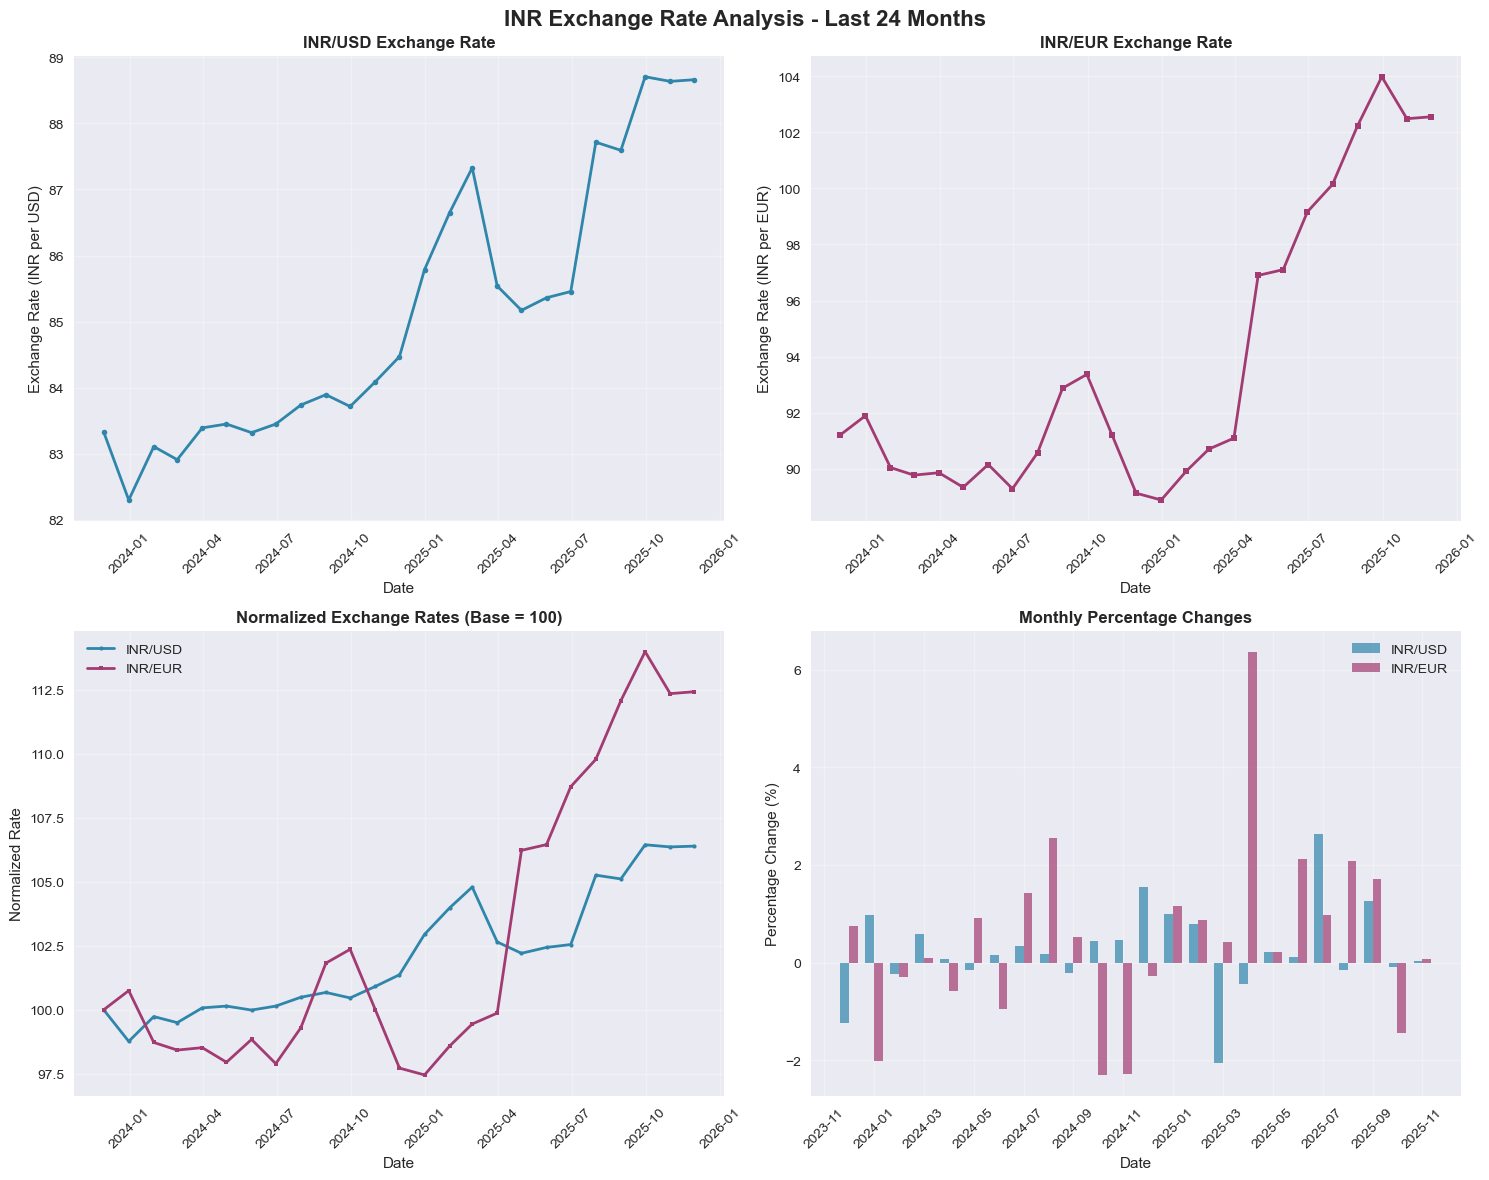

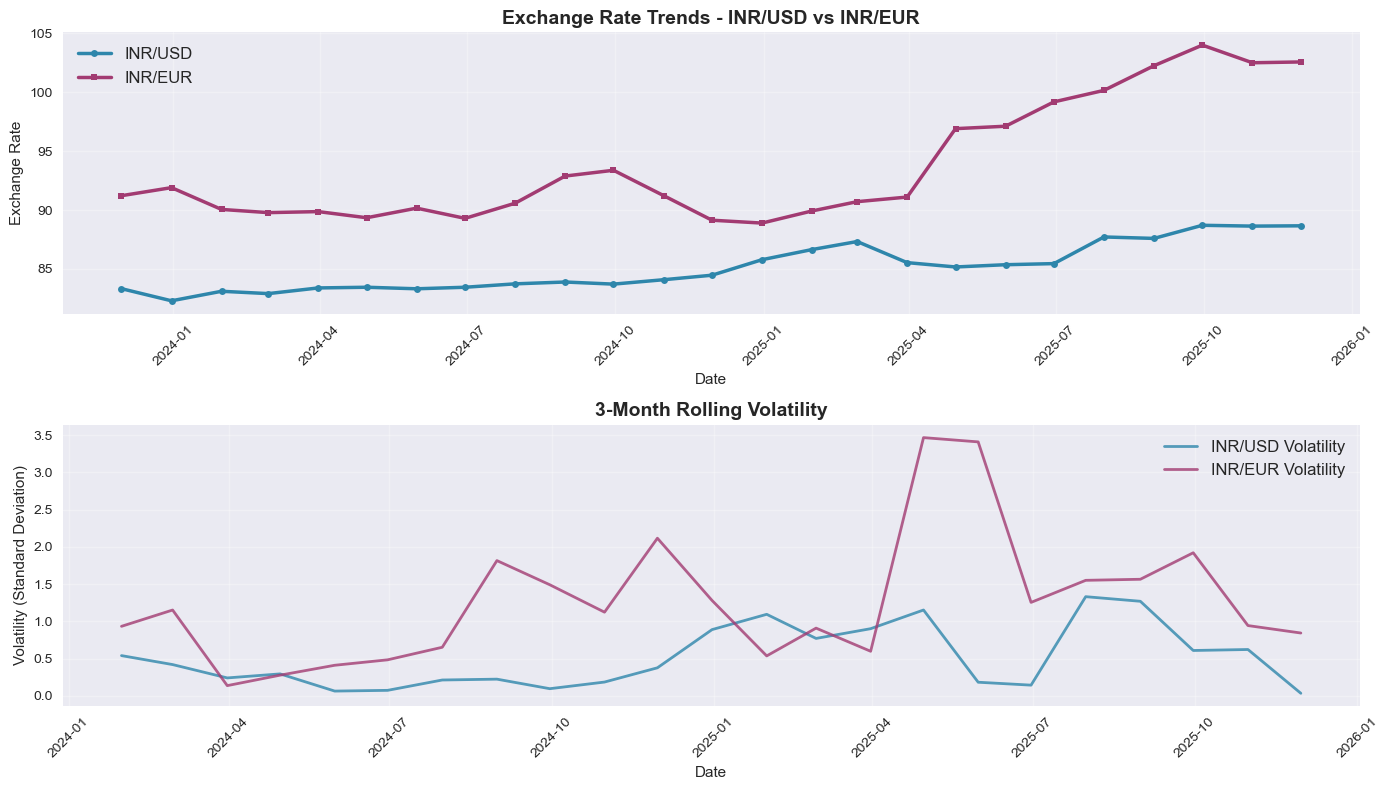

Time series plots created successfully!


In [3]:
# Create comprehensive time series plots
if inr_usd_data is not None and inr_eur_data is not None:
    
    # Set up the plotting area
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('INR Exchange Rate Analysis - Last 24 Months', fontsize=16, fontweight='bold')
    
    # Plot 1: Individual time series for INR/USD
    axes[0, 0].plot(inr_usd_data['Date'], inr_usd_data['Exchange_Rate'], 
                    linewidth=2, color='#2E86AB', marker='o', markersize=4)
    axes[0, 0].set_title('INR/USD Exchange Rate', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Exchange Rate (INR per USD)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Individual time series for INR/EUR
    axes[0, 1].plot(inr_eur_data['Date'], inr_eur_data['Exchange_Rate'], 
                    linewidth=2, color='#A23B72', marker='s', markersize=4)
    axes[0, 1].set_title('INR/EUR Exchange Rate', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Exchange Rate (INR per EUR)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Combined time series (normalized for comparison)
    # Normalize both series to start at 100 for better comparison
    inr_usd_norm = (inr_usd_data['Exchange_Rate'] / inr_usd_data['Exchange_Rate'].iloc[0]) * 100
    inr_eur_norm = (inr_eur_data['Exchange_Rate'] / inr_eur_data['Exchange_Rate'].iloc[0]) * 100
    
    axes[1, 0].plot(inr_usd_data['Date'], inr_usd_norm, 
                    linewidth=2, color='#2E86AB', label='INR/USD', marker='o', markersize=3)
    axes[1, 0].plot(inr_eur_data['Date'], inr_eur_norm, 
                    linewidth=2, color='#A23B72', label='INR/EUR', marker='s', markersize=3)
    axes[1, 0].set_title('Normalized Exchange Rates (Base = 100)', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Normalized Rate')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Monthly change comparison
    inr_usd_change = inr_usd_data['Exchange_Rate'].pct_change() * 100
    inr_eur_change = inr_eur_data['Exchange_Rate'].pct_change() * 100
    
    x_pos = np.arange(len(inr_usd_data['Date']))
    width = 0.35
    
    axes[1, 1].bar(x_pos - width/2, inr_usd_change, width, 
                   label='INR/USD', color='#2E86AB', alpha=0.7)
    axes[1, 1].bar(x_pos + width/2, inr_eur_change, width, 
                   label='INR/EUR', color='#A23B72', alpha=0.7)
    axes[1, 1].set_title('Monthly Percentage Changes', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Percentage Change (%)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Set x-axis labels for bar chart
    axes[1, 1].set_xticks(x_pos[::2])  # Show every other month
    axes[1, 1].set_xticklabels([d.strftime('%Y-%m') for d in inr_usd_data['Date'][::2]], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Additional detailed analysis plot
    plt.figure(figsize=(14, 8))
    
    # Create subplot for detailed analysis
    plt.subplot(2, 1, 1)
    plt.plot(inr_usd_data['Date'], inr_usd_data['Exchange_Rate'], 
             linewidth=2.5, color='#2E86AB', marker='o', markersize=5, label='INR/USD')
    plt.plot(inr_eur_data['Date'], inr_eur_data['Exchange_Rate'], 
             linewidth=2.5, color='#A23B72', marker='s', markersize=5, label='INR/EUR')
    plt.title('Exchange Rate Trends - INR/USD vs INR/EUR', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Volatility analysis
    plt.subplot(2, 1, 2)
    inr_usd_volatility = inr_usd_data['Exchange_Rate'].rolling(window=3).std()
    inr_eur_volatility = inr_eur_data['Exchange_Rate'].rolling(window=3).std()
    
    plt.plot(inr_usd_data['Date'], inr_usd_volatility, 
             linewidth=2, color='#2E86AB', label='INR/USD Volatility', alpha=0.8)
    plt.plot(inr_eur_data['Date'], inr_eur_volatility, 
             linewidth=2, color='#A23B72', label='INR/EUR Volatility', alpha=0.8)
    plt.title('3-Month Rolling Volatility', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Time series plots created successfully!")
    
else:
    print("Cannot create plots - data not available for one or both currency pairs")


MONTH-ON-MONTH PERCENTAGE CHANGES ANALYSIS

INR/USD Analysis:
----------------------------------------
Average Monthly Change: 0.26%
Median Monthly Change: 0.17%
Maximum Monthly Increase: 2.64%
Maximum Monthly Decrease: -2.05%
Standard Deviation: 0.91%
Total Change (24 months): 6.40%

INR/EUR Analysis:
----------------------------------------
Average Monthly Change: 0.51%
Median Monthly Change: 0.48%
Maximum Monthly Increase: 6.37%
Maximum Monthly Decrease: -2.30%
Standard Deviation: 1.84%
Total Change (24 months): 12.43%

DETAILED MONTHLY CHANGES

Monthly Exchange Rates and Changes:
   Date  INR_USD_Rate  INR_USD_MoM_Change  INR_EUR_Rate  INR_EUR_MoM_Change
2023-11       83.3303                 NaN        91.214                 NaN
2023-12       82.3020             -1.2340        91.897              0.7488
2024-01       83.1097              0.9814        90.049             -2.0109
2024-02       82.9119             -0.2380        89.778             -0.3010
2024-03       83.3930        

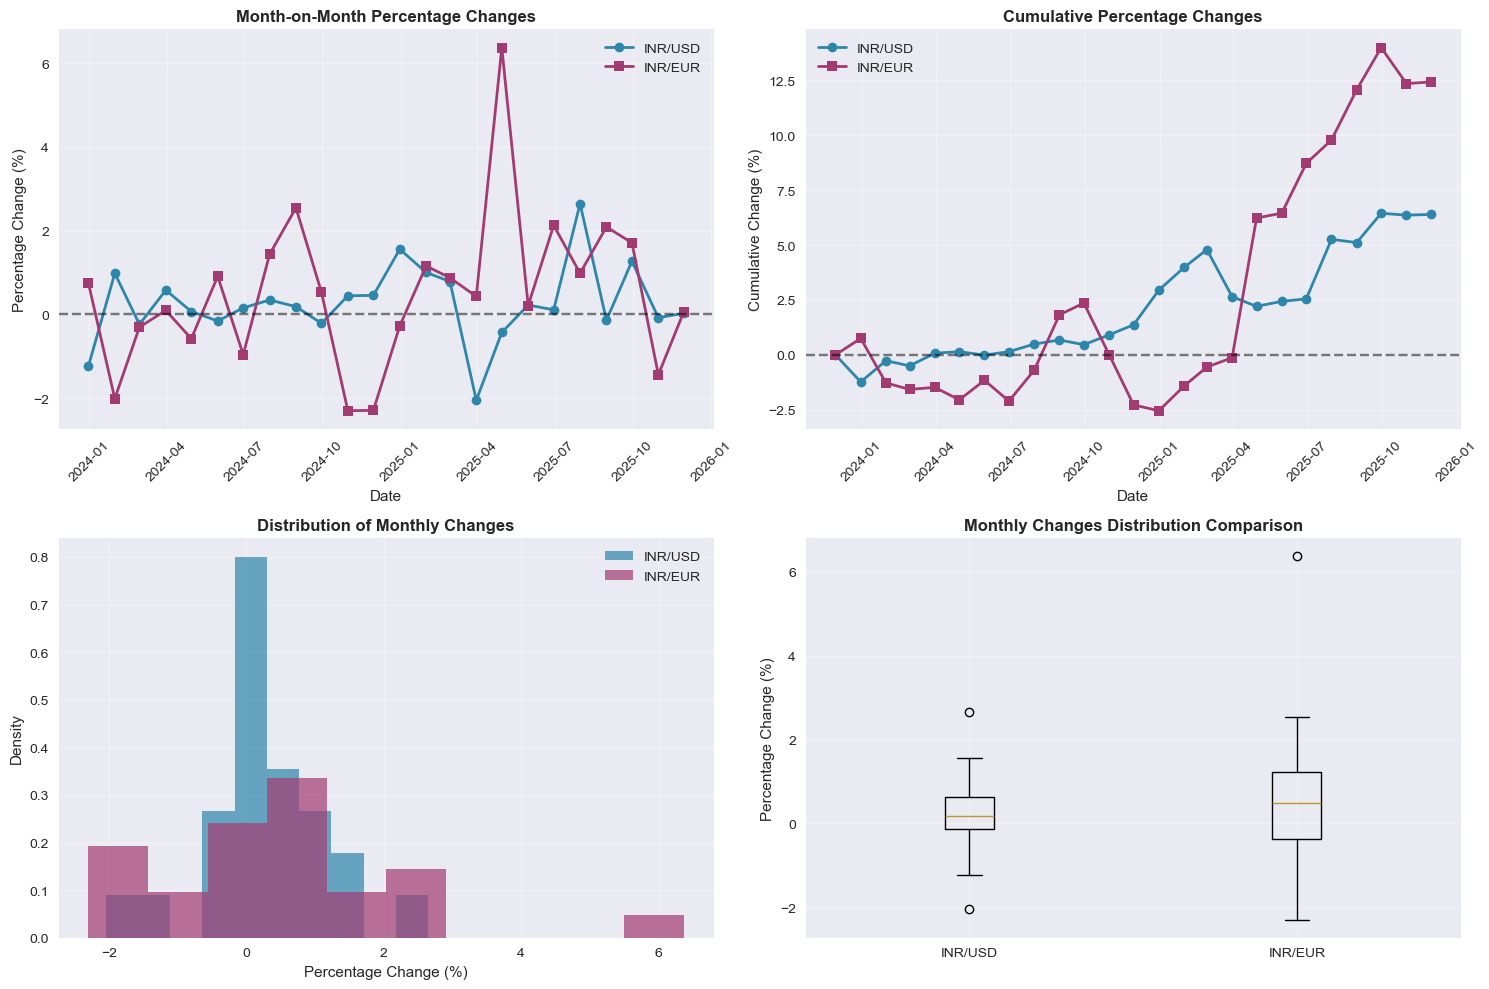


Month-on-month analysis completed successfully!


In [4]:
# Calculate month-on-month percentage changes
if inr_usd_data is not None and inr_eur_data is not None:
    
    # Create copies of the data for calculations
    inr_usd_calc = inr_usd_data.copy()
    inr_eur_calc = inr_eur_data.copy()
    
    # Calculate month-on-month percentage changes
    inr_usd_calc['MoM_Change_Pct'] = inr_usd_calc['Exchange_Rate'].pct_change() * 100
    inr_eur_calc['MoM_Change_Pct'] = inr_eur_calc['Exchange_Rate'].pct_change() * 100
    
    # Calculate additional statistics
    inr_usd_calc['Cumulative_Change_Pct'] = ((inr_usd_calc['Exchange_Rate'] / inr_usd_calc['Exchange_Rate'].iloc[0]) - 1) * 100
    inr_eur_calc['Cumulative_Change_Pct'] = ((inr_eur_calc['Exchange_Rate'] / inr_eur_calc['Exchange_Rate'].iloc[0]) - 1) * 100
    
    # Calculate rolling statistics
    inr_usd_calc['Rolling_Mean_3M'] = inr_usd_calc['Exchange_Rate'].rolling(window=3).mean()
    inr_eur_calc['Rolling_Mean_3M'] = inr_eur_calc['Exchange_Rate'].rolling(window=3).mean()
    
    inr_usd_calc['Rolling_Std_3M'] = inr_usd_calc['Exchange_Rate'].rolling(window=3).std()
    inr_eur_calc['Rolling_Std_3M'] = inr_eur_calc['Exchange_Rate'].rolling(window=3).std()
    
    # Display results
    print("="*80)
    print("MONTH-ON-MONTH PERCENTAGE CHANGES ANALYSIS")
    print("="*80)
    
    print("\nINR/USD Analysis:")
    print("-" * 40)
    print(f"Average Monthly Change: {inr_usd_calc['MoM_Change_Pct'].mean():.2f}%")
    print(f"Median Monthly Change: {inr_usd_calc['MoM_Change_Pct'].median():.2f}%")
    print(f"Maximum Monthly Increase: {inr_usd_calc['MoM_Change_Pct'].max():.2f}%")
    print(f"Maximum Monthly Decrease: {inr_usd_calc['MoM_Change_Pct'].min():.2f}%")
    print(f"Standard Deviation: {inr_usd_calc['MoM_Change_Pct'].std():.2f}%")
    print(f"Total Change (24 months): {inr_usd_calc['Cumulative_Change_Pct'].iloc[-1]:.2f}%")
    
    print("\nINR/EUR Analysis:")
    print("-" * 40)
    print(f"Average Monthly Change: {inr_eur_calc['MoM_Change_Pct'].mean():.2f}%")
    print(f"Median Monthly Change: {inr_eur_calc['MoM_Change_Pct'].median():.2f}%")
    print(f"Maximum Monthly Increase: {inr_eur_calc['MoM_Change_Pct'].max():.2f}%")
    print(f"Maximum Monthly Decrease: {inr_eur_calc['MoM_Change_Pct'].min():.2f}%")
    print(f"Standard Deviation: {inr_eur_calc['MoM_Change_Pct'].std():.2f}%")
    print(f"Total Change (24 months): {inr_eur_calc['Cumulative_Change_Pct'].iloc[-1]:.2f}%")
    
    # Display detailed monthly changes
    print("\n" + "="*80)
    print("DETAILED MONTHLY CHANGES")
    print("="*80)
    
    # Create a combined summary table
    summary_data = []
    for i in range(len(inr_usd_calc)):
        summary_data.append({
            'Date': inr_usd_calc.iloc[i]['Date'].strftime('%Y-%m'),
            'INR_USD_Rate': inr_usd_calc.iloc[i]['Exchange_Rate'],
            'INR_USD_MoM_Change': inr_usd_calc.iloc[i]['MoM_Change_Pct'],
            'INR_EUR_Rate': inr_eur_calc.iloc[i]['Exchange_Rate'],
            'INR_EUR_MoM_Change': inr_eur_calc.iloc[i]['MoM_Change_Pct']
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Display the summary table
    print("\nMonthly Exchange Rates and Changes:")
    print(summary_df.round(4).to_string(index=False))
    
    # Create visualization for percentage changes
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Month-on-month changes comparison
    plt.subplot(2, 2, 1)
    plt.plot(inr_usd_calc['Date'], inr_usd_calc['MoM_Change_Pct'], 
             marker='o', linewidth=2, color='#2E86AB', label='INR/USD')
    plt.plot(inr_eur_calc['Date'], inr_eur_calc['MoM_Change_Pct'], 
             marker='s', linewidth=2, color='#A23B72', label='INR/EUR')
    plt.title('Month-on-Month Percentage Changes', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 2: Cumulative changes
    plt.subplot(2, 2, 2)
    plt.plot(inr_usd_calc['Date'], inr_usd_calc['Cumulative_Change_Pct'], 
             marker='o', linewidth=2, color='#2E86AB', label='INR/USD')
    plt.plot(inr_eur_calc['Date'], inr_eur_calc['Cumulative_Change_Pct'], 
             marker='s', linewidth=2, color='#A23B72', label='INR/EUR')
    plt.title('Cumulative Percentage Changes', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Change (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 3: Distribution of monthly changes
    plt.subplot(2, 2, 3)
    plt.hist(inr_usd_calc['MoM_Change_Pct'].dropna(), bins=10, alpha=0.7, 
             color='#2E86AB', label='INR/USD', density=True)
    plt.hist(inr_eur_calc['MoM_Change_Pct'].dropna(), bins=10, alpha=0.7, 
             color='#A23B72', label='INR/EUR', density=True)
    plt.title('Distribution of Monthly Changes', fontweight='bold')
    plt.xlabel('Percentage Change (%)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Box plot comparison
    plt.subplot(2, 2, 4)
    data_for_box = [inr_usd_calc['MoM_Change_Pct'].dropna(), 
                    inr_eur_calc['MoM_Change_Pct'].dropna()]
    plt.boxplot(data_for_box, labels=['INR/USD', 'INR/EUR'])
    plt.title('Monthly Changes Distribution Comparison', fontweight='bold')
    plt.ylabel('Percentage Change (%)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMonth-on-month analysis completed successfully!")
    
else:
    print("Cannot perform calculations - data not available for one or both currency pairs")


In [5]:
# Export all data and results to Excel
if inr_usd_data is not None and inr_eur_data is not None:
    
    # Create Excel file with multiple sheets
    excel_filename = 'INR_Exchange_Rate_Analysis.xlsx'
    
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        
        # Sheet 1: Raw INR/USD Data
        inr_usd_export = inr_usd_calc.copy()
        inr_usd_export['Date'] = inr_usd_export['Date'].dt.strftime('%Y-%m-%d')
        inr_usd_export.to_excel(writer, sheet_name='INR_USD_Raw_Data', index=False)
        
        # Sheet 2: Raw INR/EUR Data
        inr_eur_export = inr_eur_calc.copy()
        inr_eur_export['Date'] = inr_eur_export['Date'].dt.strftime('%Y-%m-%d')
        inr_eur_export.to_excel(writer, sheet_name='INR_EUR_Raw_Data', index=False)
        
        # Sheet 3: Summary Statistics
        summary_stats = {
            'Metric': [
                'Average Monthly Change (%)',
                'Median Monthly Change (%)',
                'Maximum Monthly Increase (%)',
                'Maximum Monthly Decrease (%)',
                'Standard Deviation (%)',
                'Total Change 24 months (%)',
                'Average Exchange Rate',
                'Minimum Exchange Rate',
                'Maximum Exchange Rate'
            ],
            'INR_USD': [
                inr_usd_calc['MoM_Change_Pct'].mean(),
                inr_usd_calc['MoM_Change_Pct'].median(),
                inr_usd_calc['MoM_Change_Pct'].max(),
                inr_usd_calc['MoM_Change_Pct'].min(),
                inr_usd_calc['MoM_Change_Pct'].std(),
                inr_usd_calc['Cumulative_Change_Pct'].iloc[-1],
                inr_usd_calc['Exchange_Rate'].mean(),
                inr_usd_calc['Exchange_Rate'].min(),
                inr_usd_calc['Exchange_Rate'].max()
            ],
            'INR_EUR': [
                inr_eur_calc['MoM_Change_Pct'].mean(),
                inr_eur_calc['MoM_Change_Pct'].median(),
                inr_eur_calc['MoM_Change_Pct'].max(),
                inr_eur_calc['MoM_Change_Pct'].min(),
                inr_eur_calc['MoM_Change_Pct'].std(),
                inr_eur_calc['Cumulative_Change_Pct'].iloc[-1],
                inr_eur_calc['Exchange_Rate'].mean(),
                inr_eur_calc['Exchange_Rate'].min(),
                inr_eur_calc['Exchange_Rate'].max()
            ]
        }
        
        summary_stats_df = pd.DataFrame(summary_stats)
        summary_stats_df.to_excel(writer, sheet_name='Summary_Statistics', index=False)
        
        # Sheet 4: Monthly Comparison
        summary_df_export = summary_df.copy()
        summary_df_export.to_excel(writer, sheet_name='Monthly_Comparison', index=False)
        
        # Sheet 5: Correlation Analysis
        correlation_data = {
            'Date': inr_usd_calc['Date'].dt.strftime('%Y-%m-%d'),
            'INR_USD_Rate': inr_usd_calc['Exchange_Rate'],
            'INR_EUR_Rate': inr_eur_calc['Exchange_Rate'],
            'INR_USD_MoM_Change': inr_usd_calc['MoM_Change_Pct'],
            'INR_EUR_MoM_Change': inr_eur_calc['MoM_Change_Pct']
        }
        
        correlation_df = pd.DataFrame(correlation_data)
        correlation_df.to_excel(writer, sheet_name='Correlation_Data', index=False)
        
        # Add correlation matrix
        corr_matrix = correlation_df[['INR_USD_Rate', 'INR_EUR_Rate', 'INR_USD_MoM_Change', 'INR_EUR_MoM_Change']].corr()
        corr_matrix.to_excel(writer, sheet_name='Correlation_Matrix')
    
    print("="*60)
    print("EXPORT TO EXCEL COMPLETED")
    print("="*60)
    print(f"File saved as: {excel_filename}")
    print("\nExcel file contains the following sheets:")
    print("1. INR_USD_Raw_Data - Complete INR/USD data with calculations")
    print("2. INR_EUR_Raw_Data - Complete INR/EUR data with calculations")
    print("3. Summary_Statistics - Key statistics for both currency pairs")
    print("4. Monthly_Comparison - Side-by-side monthly comparison")
    print("5. Correlation_Data - Data for correlation analysis")
    print("6. Correlation_Matrix - Correlation matrix between variables")
    
    # Display correlation information
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    # Calculate correlations
    rate_correlation = inr_usd_calc['Exchange_Rate'].corr(inr_eur_calc['Exchange_Rate'])
    change_correlation = inr_usd_calc['MoM_Change_Pct'].corr(inr_eur_calc['MoM_Change_Pct'])
    
    print(f"Exchange Rate Correlation (INR/USD vs INR/EUR): {rate_correlation:.4f}")
    print(f"Monthly Change Correlation (INR/USD vs INR/EUR): {change_correlation:.4f}")
    
    if abs(rate_correlation) > 0.7:
        print("→ Strong correlation between exchange rates")
    elif abs(rate_correlation) > 0.3:
        print("→ Moderate correlation between exchange rates")
    else:
        print("→ Weak correlation between exchange rates")
    
    print(f"\nExcel file '{excel_filename}' has been successfully created!")
    print("You can now open this file in Excel to view all the data and analysis.")
    
else:
    print("Cannot export data - required data not available")


EXPORT TO EXCEL COMPLETED
File saved as: INR_Exchange_Rate_Analysis.xlsx

Excel file contains the following sheets:
1. INR_USD_Raw_Data - Complete INR/USD data with calculations
2. INR_EUR_Raw_Data - Complete INR/EUR data with calculations
3. Summary_Statistics - Key statistics for both currency pairs
4. Monthly_Comparison - Side-by-side monthly comparison
5. Correlation_Data - Data for correlation analysis
6. Correlation_Matrix - Correlation matrix between variables

CORRELATION ANALYSIS
Exchange Rate Correlation (INR/USD vs INR/EUR): 0.7624
Monthly Change Correlation (INR/USD vs INR/EUR): -0.1254
→ Strong correlation between exchange rates

Excel file 'INR_Exchange_Rate_Analysis.xlsx' has been successfully created!
You can now open this file in Excel to view all the data and analysis.


IDENTIFYING THE 3 BIGGEST SWING CHANGES

🔴 TOP 3 BIGGEST SWINGS - USD/INR
--------------------------------------------------------------------------------

1. 2025-07 - 📈 Increase
   Rate: ₹87.7146 per USD
   Change: +2.64%
   Absolute Change: 2.64%

2. 2025-03 - 📉 Decrease
   Rate: ₹85.5388 per USD
   Change: -2.05%
   Absolute Change: 2.05%

3. 2024-12 - 📈 Increase
   Rate: ₹85.7866 per USD
   Change: +1.56%
   Absolute Change: 1.56%

🔵 TOP 3 BIGGEST SWINGS - EUR/INR
--------------------------------------------------------------------------------

1. 2025-04 - 📈 Increase
   Rate: ₹96.8980 per EUR
   Change: +6.37%
   Absolute Change: 6.37%

2. 2024-08 - 📈 Increase
   Rate: ₹92.8780 per EUR
   Change: +2.54%
   Absolute Change: 2.54%

3. 2024-10 - 📉 Decrease
   Rate: ₹91.2230 per EUR
   Change: -2.30%
   Absolute Change: 2.30%


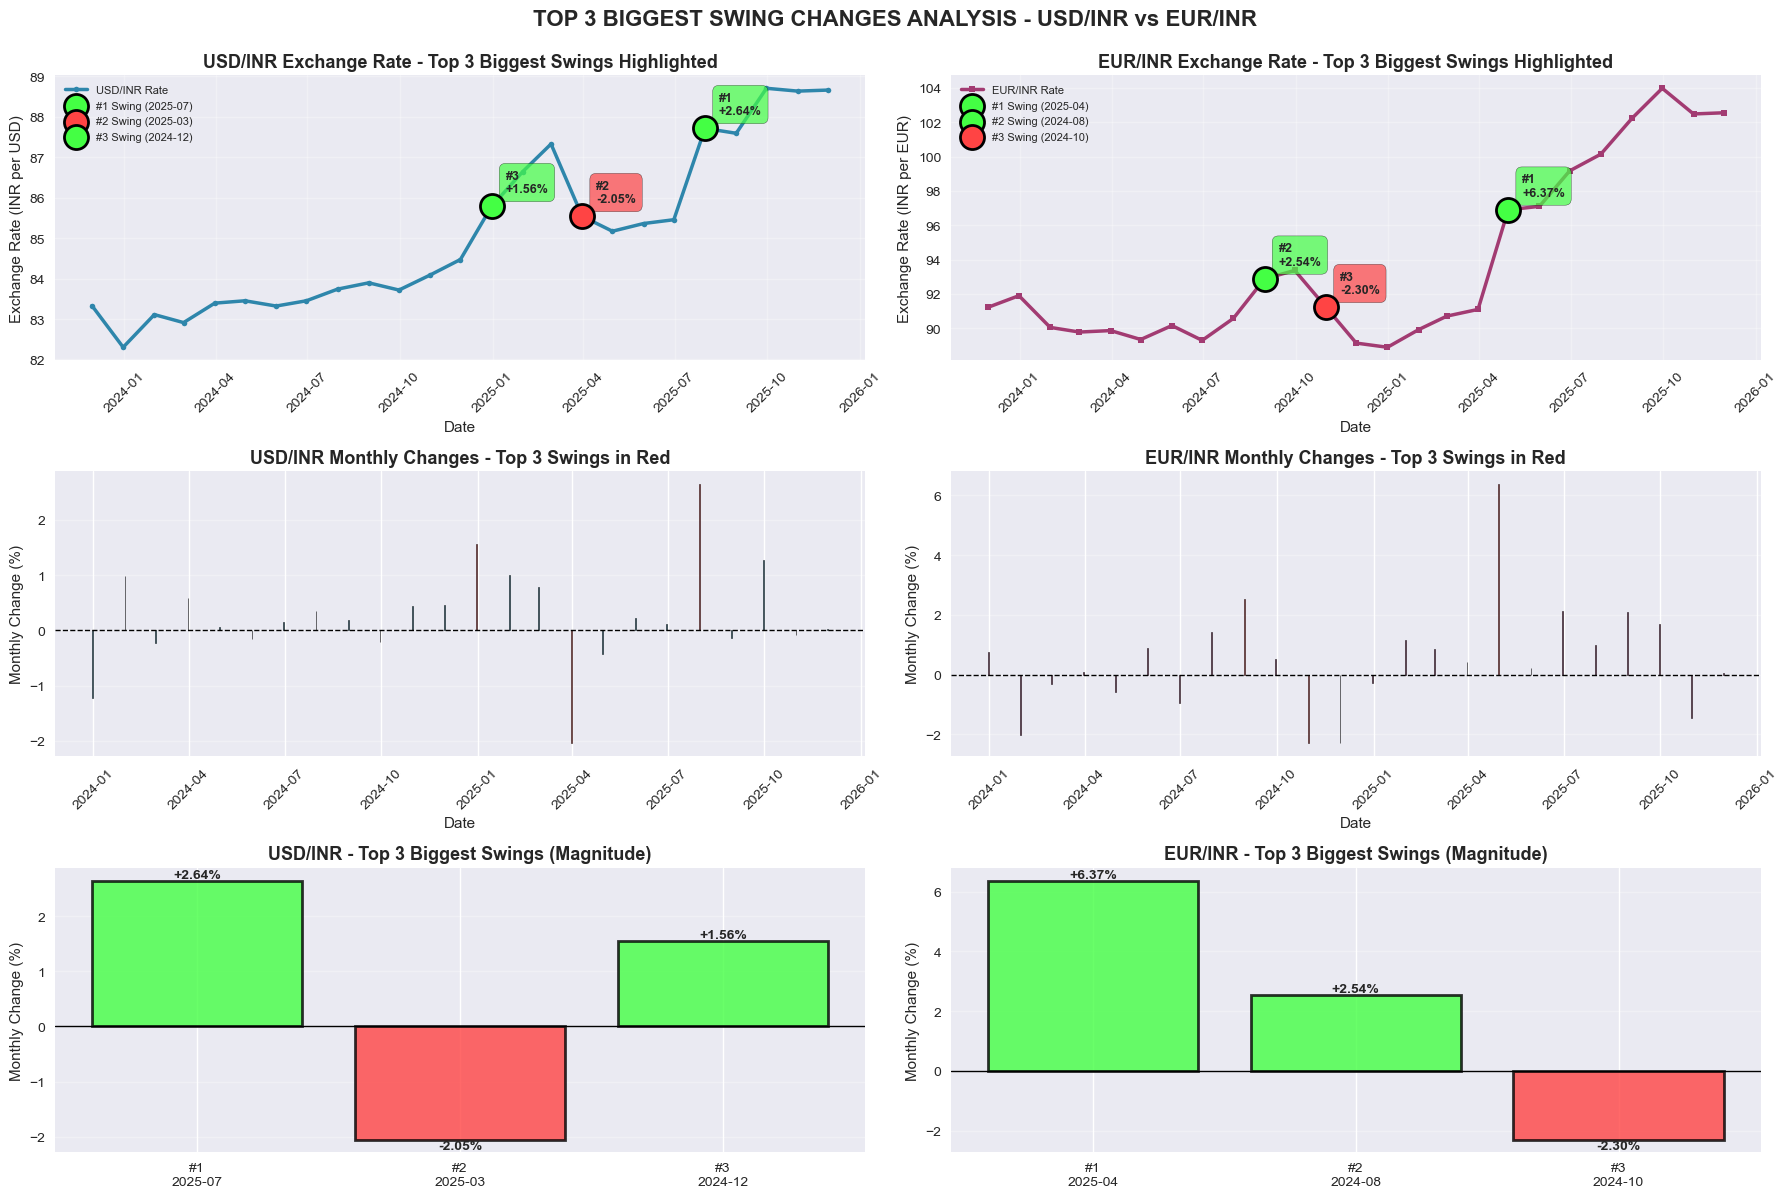


COMPARATIVE SUMMARY

USD/INR - Biggest absolute swing: 2.64% (2025-07)
EUR/INR - Biggest absolute swing: 6.37% (2025-04)

→ EUR/INR showed higher volatility in its biggest swing

Average of top 3 swings:
  USD/INR: 2.08%
  EUR/INR: 3.74%

✅ Analysis of biggest swing changes completed successfully!


In [6]:
# Identify and visualize the 3 biggest swing changes for both currency pairs
if inr_usd_data is not None and inr_eur_data is not None:
    
    print("="*80)
    print("IDENTIFYING THE 3 BIGGEST SWING CHANGES")
    print("="*80)
    
    # Add absolute change column for easier identification
    inr_usd_calc['Abs_MoM_Change_Pct'] = inr_usd_calc['MoM_Change_Pct'].abs()
    inr_eur_calc['Abs_MoM_Change_Pct'] = inr_eur_calc['MoM_Change_Pct'].abs()
    
    # Get top 3 biggest swings for USD/INR
    top_3_usd = inr_usd_calc.nlargest(3, 'Abs_MoM_Change_Pct')[['Date', 'Exchange_Rate', 'MoM_Change_Pct', 'Abs_MoM_Change_Pct']].copy()
    top_3_usd['Date_Str'] = top_3_usd['Date'].dt.strftime('%Y-%m')
    
    # Get top 3 biggest swings for EUR/INR
    top_3_eur = inr_eur_calc.nlargest(3, 'Abs_MoM_Change_Pct')[['Date', 'Exchange_Rate', 'MoM_Change_Pct', 'Abs_MoM_Change_Pct']].copy()
    top_3_eur['Date_Str'] = top_3_eur['Date'].dt.strftime('%Y-%m')
    
    # Display USD/INR top 3 swings
    print("\n🔴 TOP 3 BIGGEST SWINGS - USD/INR")
    print("-" * 80)
    for idx, (i, row) in enumerate(top_3_usd.iterrows(), 1):
        direction = "📈 Increase" if row['MoM_Change_Pct'] > 0 else "📉 Decrease"
        print(f"\n{idx}. {row['Date_Str']} - {direction}")
        print(f"   Rate: ₹{row['Exchange_Rate']:.4f} per USD")
        print(f"   Change: {row['MoM_Change_Pct']:+.2f}%")
        print(f"   Absolute Change: {row['Abs_MoM_Change_Pct']:.2f}%")
    
    # Display EUR/INR top 3 swings
    print("\n" + "="*80)
    print("🔵 TOP 3 BIGGEST SWINGS - EUR/INR")
    print("-" * 80)
    for idx, (i, row) in enumerate(top_3_eur.iterrows(), 1):
        direction = "📈 Increase" if row['MoM_Change_Pct'] > 0 else "📉 Decrease"
        print(f"\n{idx}. {row['Date_Str']} - {direction}")
        print(f"   Rate: ₹{row['Exchange_Rate']:.4f} per EUR")
        print(f"   Change: {row['MoM_Change_Pct']:+.2f}%")
        print(f"   Absolute Change: {row['Abs_MoM_Change_Pct']:.2f}%")
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(18, 12))
    
    # Plot 1: USD/INR with top 3 swings highlighted
    ax1 = plt.subplot(3, 2, 1)
    ax1.plot(inr_usd_calc['Date'], inr_usd_calc['Exchange_Rate'], 
             linewidth=2.5, color='#2E86AB', marker='o', markersize=4, label='USD/INR Rate')
    
    # Highlight top 3 swings
    for idx, (i, row) in enumerate(top_3_usd.iterrows(), 1):
        color = '#FF4444' if row['MoM_Change_Pct'] < 0 else '#44FF44'
        ax1.scatter(row['Date'], row['Exchange_Rate'], 
                   s=300, color=color, edgecolors='black', linewidths=2, 
                   zorder=5, label=f"#{idx} Swing ({row['Date_Str']})")
        ax1.annotate(f"#{idx}\n{row['MoM_Change_Pct']:+.2f}%", 
                    xy=(row['Date'], row['Exchange_Rate']),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1.5))
    
    ax1.set_title('USD/INR Exchange Rate - Top 3 Biggest Swings Highlighted', 
                  fontsize=13, fontweight='bold')
    ax1.set_xlabel('Date', fontsize=11)
    ax1.set_ylabel('Exchange Rate (INR per USD)', fontsize=11)
    ax1.legend(loc='upper left', fontsize=8)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: EUR/INR with top 3 swings highlighted
    ax2 = plt.subplot(3, 2, 2)
    ax2.plot(inr_eur_calc['Date'], inr_eur_calc['Exchange_Rate'], 
             linewidth=2.5, color='#A23B72', marker='s', markersize=4, label='EUR/INR Rate')
    
    # Highlight top 3 swings
    for idx, (i, row) in enumerate(top_3_eur.iterrows(), 1):
        color = '#FF4444' if row['MoM_Change_Pct'] < 0 else '#44FF44'
        ax2.scatter(row['Date'], row['Exchange_Rate'], 
                   s=300, color=color, edgecolors='black', linewidths=2, 
                   zorder=5, label=f"#{idx} Swing ({row['Date_Str']})")
        ax2.annotate(f"#{idx}\n{row['MoM_Change_Pct']:+.2f}%", 
                    xy=(row['Date'], row['Exchange_Rate']),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1.5))
    
    ax2.set_title('EUR/INR Exchange Rate - Top 3 Biggest Swings Highlighted', 
                  fontsize=13, fontweight='bold')
    ax2.set_xlabel('Date', fontsize=11)
    ax2.set_ylabel('Exchange Rate (INR per EUR)', fontsize=11)
    ax2.legend(loc='upper left', fontsize=8)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: USD/INR Monthly Changes with top 3 highlighted
    ax3 = plt.subplot(3, 2, 3)
    colors_usd = ['#FF4444' if abs(x) in top_3_usd['Abs_MoM_Change_Pct'].values 
                  else '#2E86AB' for x in inr_usd_calc['MoM_Change_Pct']]
    ax3.bar(inr_usd_calc['Date'], inr_usd_calc['MoM_Change_Pct'], 
            color=colors_usd, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax3.set_title('USD/INR Monthly Changes - Top 3 Swings in Red', 
                  fontsize=13, fontweight='bold')
    ax3.set_xlabel('Date', fontsize=11)
    ax3.set_ylabel('Monthly Change (%)', fontsize=11)
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.tick_params(axis='x', rotation=45)
    
    # Plot 4: EUR/INR Monthly Changes with top 3 highlighted
    ax4 = plt.subplot(3, 2, 4)
    colors_eur = ['#FF4444' if abs(x) in top_3_eur['Abs_MoM_Change_Pct'].values 
                  else '#A23B72' for x in inr_eur_calc['MoM_Change_Pct']]
    ax4.bar(inr_eur_calc['Date'], inr_eur_calc['MoM_Change_Pct'], 
            color=colors_eur, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax4.set_title('EUR/INR Monthly Changes - Top 3 Swings in Red', 
                  fontsize=13, fontweight='bold')
    ax4.set_xlabel('Date', fontsize=11)
    ax4.set_ylabel('Monthly Change (%)', fontsize=11)
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.tick_params(axis='x', rotation=45)
    
    # Plot 5: Comparison bar chart of top 3 swings
    ax5 = plt.subplot(3, 2, 5)
    x_labels_usd = [f"#{i+1}\n{row['Date_Str']}" for i, (_, row) in enumerate(top_3_usd.iterrows())]
    colors_bars_usd = ['#44FF44' if x > 0 else '#FF4444' for x in top_3_usd['MoM_Change_Pct']]
    bars_usd = ax5.bar(x_labels_usd, top_3_usd['MoM_Change_Pct'], 
                       color=colors_bars_usd, alpha=0.8, edgecolor='black', linewidth=2)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars_usd, top_3_usd['MoM_Change_Pct'])):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:+.2f}%',
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=10, fontweight='bold')
    
    ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax5.set_title('USD/INR - Top 3 Biggest Swings (Magnitude)', 
                  fontsize=13, fontweight='bold')
    ax5.set_ylabel('Monthly Change (%)', fontsize=11)
    ax5.grid(True, alpha=0.3, axis='y')
    
    # Plot 6: Comparison bar chart of top 3 swings for EUR
    ax6 = plt.subplot(3, 2, 6)
    x_labels_eur = [f"#{i+1}\n{row['Date_Str']}" for i, (_, row) in enumerate(top_3_eur.iterrows())]
    colors_bars_eur = ['#44FF44' if x > 0 else '#FF4444' for x in top_3_eur['MoM_Change_Pct']]
    bars_eur = ax6.bar(x_labels_eur, top_3_eur['MoM_Change_Pct'], 
                       color=colors_bars_eur, alpha=0.8, edgecolor='black', linewidth=2)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars_eur, top_3_eur['MoM_Change_Pct'])):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:+.2f}%',
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=10, fontweight='bold')
    
    ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax6.set_title('EUR/INR - Top 3 Biggest Swings (Magnitude)', 
                  fontsize=13, fontweight='bold')
    ax6.set_ylabel('Monthly Change (%)', fontsize=11)
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('TOP 3 BIGGEST SWING CHANGES ANALYSIS - USD/INR vs EUR/INR', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    # Create a comparison summary
    print("\n" + "="*80)
    print("COMPARATIVE SUMMARY")
    print("="*80)
    
    print(f"\nUSD/INR - Biggest absolute swing: {top_3_usd.iloc[0]['Abs_MoM_Change_Pct']:.2f}% ({top_3_usd.iloc[0]['Date_Str']})")
    print(f"EUR/INR - Biggest absolute swing: {top_3_eur.iloc[0]['Abs_MoM_Change_Pct']:.2f}% ({top_3_eur.iloc[0]['Date_Str']})")
    
    if top_3_usd.iloc[0]['Abs_MoM_Change_Pct'] > top_3_eur.iloc[0]['Abs_MoM_Change_Pct']:
        print("\n→ USD/INR showed higher volatility in its biggest swing")
    else:
        print("\n→ EUR/INR showed higher volatility in its biggest swing")
    
    # Calculate average of top 3 swings
    avg_top_3_usd = top_3_usd['Abs_MoM_Change_Pct'].mean()
    avg_top_3_eur = top_3_eur['Abs_MoM_Change_Pct'].mean()
    
    print(f"\nAverage of top 3 swings:")
    print(f"  USD/INR: {avg_top_3_usd:.2f}%")
    print(f"  EUR/INR: {avg_top_3_eur:.2f}%")
    
    print("\n✅ Analysis of biggest swing changes completed successfully!")
    
else:
    print("Cannot perform swing analysis - data not available for one or both currency pairs")

## ⚠️ IMPORTANT: Required Packages for Real Data

This analysis uses **ONLY REAL DATA** from official sources:

### Data Sources:
- **Crude Oil & USD Index**: Yahoo Finance (via `yfinance`)
- **US & India Inflation (CPI)**: Federal Reserve Economic Data (FRED) via `pandas-datareader`
- **US Federal Funds Rate**: FRED via `pandas-datareader`
- **India Repo Rate**: Reserve Bank of India (RBI) official policy rates

### Required Package Installation:

If you get errors about missing data or "Failed" status, install the required package:

```bash
pip install pandas-datareader
```

**Note**: Some data sources may have delays or availability issues. The analysis will work with whatever real data is successfully collected and will skip unavailable factors.

# 📊 PART 2: FACTORS AFFECTING EXCHANGE RATES

---

## Objective:
Analyze key economic factors that influence INR/USD exchange rate movements through:
- Data collection from multiple sources
- Correlation analysis
- Advanced machine learning models
- Predictive scenario analysis

## Factors Under Analysis:
1. **Crude Oil Price (Brent)** - Energy cost impact on trade balance
2. **US Federal Funds Rate** - US monetary policy influence
3. **India Repo Rate** - India's monetary policy stance
4. **USD Index (DXY)** - Overall USD strength
5. **Inflation Differential** - Price stability comparison (India vs US)

In [15]:
# STEP 1: DATA COLLECTION FOR ECONOMIC FACTORS
# ============================================================

print("="*80)
print("COLLECTING ECONOMIC FACTORS DATA - REAL DATA ONLY")
print("="*80)

# Define date range - using last 3 years for cleaner, more relevant data
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)  # 3 years

print(f"\nData Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"Total Months: ~36 months\n")

# ============================================================
# 1. CRUDE OIL PRICE (BRENT CRUDE)
# ============================================================
print("1️⃣ Fetching Crude Oil Price (Brent Crude)...")
try:
    oil_ticker = yf.Ticker("BZ=F")  # Brent Crude Futures
    oil_data = oil_ticker.history(start=start_date, end=end_date)
    
    if oil_data.empty:
        # Fallback to alternative ticker
        oil_ticker = yf.Ticker("BNO")  # Brent Oil ETF
        oil_data = oil_ticker.history(start=start_date, end=end_date)
    
    oil_monthly = oil_data['Close'].resample('M').last()
    oil_monthly = oil_monthly.to_frame()
    oil_monthly.columns = ['Crude_Oil_Price']
    
    # Remove timezone for consistency
    if oil_monthly.index.tz is not None:
        oil_monthly.index = oil_monthly.index.tz_localize(None)
    
    print(f"   ✅ Successfully fetched {len(oil_monthly)} months of data")
    print(f"   Current Price: ${oil_monthly['Crude_Oil_Price'].iloc[-1]:.2f}")
    print(f"   Average Price: ${oil_monthly['Crude_Oil_Price'].mean():.2f}")
    print(f"   Range: ${oil_monthly['Crude_Oil_Price'].min():.2f} - ${oil_monthly['Crude_Oil_Price'].max():.2f}")
except Exception as e:
    print(f"   ❌ Error: {e}")
    oil_monthly = None

# ============================================================
# 2. USD INDEX (DXY) - Dollar Strength
# ============================================================
print("\n2️⃣ Fetching USD Index (DXY)...")
try:
    dxy_ticker = yf.Ticker("DX-Y.NYB")  # USD Index
    dxy_data = dxy_ticker.history(start=start_date, end=end_date)
    
    if dxy_data.empty:
        # Fallback to alternative
        dxy_ticker = yf.Ticker("UUP")  # USD Index ETF
        dxy_data = dxy_ticker.history(start=start_date, end=end_date)
    
    dxy_monthly = dxy_data['Close'].resample('M').last()
    dxy_monthly = dxy_monthly.to_frame()
    dxy_monthly.columns = ['USD_Index']
    
    # Remove timezone for consistency
    if dxy_monthly.index.tz is not None:
        dxy_monthly.index = dxy_monthly.index.tz_localize(None)
    
    print(f"   ✅ Successfully fetched {len(dxy_monthly)} months of data")
    print(f"   Current Index: {dxy_monthly['USD_Index'].iloc[-1]:.2f}")
    print(f"   Average Index: {dxy_monthly['USD_Index'].mean():.2f}")
    print(f"   Range: {dxy_monthly['USD_Index'].min():.2f} - {dxy_monthly['USD_Index'].max():.2f}")
except Exception as e:
    print(f"   ❌ Error: {e}")
    dxy_monthly = None

# ============================================================
# 3. INFLATION DATA (India and US CPI) - REAL DATA FROM FRED
# ============================================================
print("\n3️⃣ Fetching Inflation Data (CPI) - Real Data from FRED...")

us_cpi_change = None
india_cpi_change = None

try:
    from pandas_datareader import data as pdr
    
    # US CPI
    try:
        us_cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
        us_cpi_monthly = us_cpi.resample('M').last()
        us_cpi_change = us_cpi_monthly.pct_change(12) * 100  # YoY inflation
        us_cpi_change.columns = ['US_Inflation']
        print(f"   ✅ US CPI (FRED): {len(us_cpi_change)} months")
        print(f"   Current US Inflation: {us_cpi_change['US_Inflation'].iloc[-1]:.2f}%")
    except Exception as e:
        print(f"   ❌ US CPI Error: {e}")
        us_cpi_change = None
    
    # India CPI
    try:
        india_cpi = pdr.get_data_fred('INDCPIALLMINMEI', start=start_date, end=end_date)
        india_cpi_monthly = india_cpi.resample('M').last()
        india_cpi_change = india_cpi_monthly.pct_change(12) * 100  # YoY inflation
        india_cpi_change.columns = ['India_Inflation']
        print(f"   ✅ India CPI (FRED): {len(india_cpi_change)} months")
        print(f"   Current India Inflation: {india_cpi_change['India_Inflation'].iloc[-1]:.2f}%")
    except Exception as e:
        print(f"   ❌ India CPI Error: {e}")
        india_cpi_change = None
        
except ImportError:
    print(f"   ❌ pandas_datareader not installed")
    print(f"   💡 Install with: pip install pandas-datareader")

# Calculate inflation differential only if both are available
if us_cpi_change is not None and india_cpi_change is not None:
    inflation_diff = pd.DataFrame(index=us_cpi_change.index)
    inflation_diff['Inflation_Differential'] = india_cpi_change['India_Inflation'] - us_cpi_change['US_Inflation']
    print(f"\n   ✅ Inflation Differential calculated")
    print(f"   Average Differential: {inflation_diff['Inflation_Differential'].mean():.2f}%")
else:
    inflation_diff = None
    print(f"\n   ⚠️ Inflation Differential not available - missing CPI data")

# ============================================================
# 4. US FEDERAL FUNDS RATE - REAL DATA FROM FRED
# ============================================================
print("\n4️⃣ Fetching US Federal Funds Rate (Real Data from FRED)...")
fed_rate_monthly = None

try:
    from pandas_datareader import data as pdr
    fed_rate = pdr.get_data_fred('FEDFUNDS', start=start_date, end=end_date)
    fed_rate_monthly = fed_rate.resample('M').last()
    fed_rate_monthly.columns = ['US_Fed_Rate']
    print(f"   ✅ Successfully fetched {len(fed_rate_monthly)} months")
    print(f"   Current Rate: {fed_rate_monthly['US_Fed_Rate'].iloc[-1]:.2f}%")
    print(f"   Average Rate: {fed_rate_monthly['US_Fed_Rate'].mean():.2f}%")
    print(f"   Range: {fed_rate_monthly['US_Fed_Rate'].min():.2f}% - {fed_rate_monthly['US_Fed_Rate'].max():.2f}%")
except Exception as e:
    print(f"   ❌ Error: {e}")
    print(f"   💡 Install pandas-datareader: pip install pandas-datareader")

# ============================================================
# 5. INDIA REPO RATE - USER PROVIDED REAL DATA
# ============================================================
print("\n5️⃣ Processing India Repo Rate (User Provided Real Data)...")

# Real India Repo Rate data provided by user
india_repo_data_dict = {
    '2020-12-04': 4.00,
    '2021-02-05': 4.00,
    '2021-04-07': 4.00,
    '2021-06-04': 4.00,
    '2021-08-06': 4.00,
    '2021-10-09': 4.00,
    '2021-12-08': 4.00,
    '2022-02-10': 4.00,
    '2022-04-08': 4.00,
    '2022-05-04': 4.40,
    '2022-06-08': 4.90,
    '2022-08-05': 5.40,
    '2022-09-30': 5.90,
    '2022-12-07': 6.25,
    '2023-02-08': 6.50,
    '2023-04-06': 6.50,
    '2023-06-08': 6.50,
    '2023-08-10': 6.50,
    '2023-10-06': 6.50,
    '2023-12-08': 6.50,
    '2024-02-08': 6.50,
    '2024-04-06': 6.50,
    '2024-06-07': 6.50,
    '2024-08-08': 6.50,
    '2024-10-08': 6.50,
    '2024-12-06': 6.50,
    '2025-02-07': 6.25,
    '2025-04-09': 6.00,
    '2025-06-06': 5.50,
    '2025-10-01': 5.50
}

# Create a complete time series at monthly frequency
if oil_monthly is not None:
    # Use oil_monthly index as reference (already timezone-naive)
    india_repo_monthly = pd.DataFrame(index=oil_monthly.index, columns=['India_Repo_Rate'])
    
    # Convert user data to series with timezone-naive dates
    repo_series = pd.Series(india_repo_data_dict)
    repo_series.index = pd.to_datetime(repo_series.index)
    # Ensure timezone-naive
    if repo_series.index.tz is not None:
        repo_series.index = repo_series.index.tz_localize(None)
    
    # For each month in our range, find the applicable repo rate
    for date_idx in india_repo_monthly.index:
        # Find the most recent repo rate announcement before or on this date
        applicable_rates = repo_series[repo_series.index <= date_idx]
        
        if len(applicable_rates) > 0:
            india_repo_monthly.loc[date_idx, 'India_Repo_Rate'] = applicable_rates.iloc[-1]
        else:
            # If no rate available yet, use the first available rate
            india_repo_monthly.loc[date_idx, 'India_Repo_Rate'] = repo_series.iloc[0]
    
    # Convert to float
    india_repo_monthly['India_Repo_Rate'] = india_repo_monthly['India_Repo_Rate'].astype(float)
    
    print(f"   ✅ Real RBI data processed: {len(india_repo_monthly)} months")
    print(f"   Current Rate: {india_repo_monthly['India_Repo_Rate'].iloc[-1]:.2f}%")
    print(f"   Average Rate: {india_repo_monthly['India_Repo_Rate'].mean():.2f}%")
    print(f"   Range: {india_repo_monthly['India_Repo_Rate'].min():.2f}% - {india_repo_monthly['India_Repo_Rate'].max():.2f}%")
    print(f"   Index alignment: Matched with oil_monthly index")
else:
    india_repo_monthly = None
    print(f"   ❌ Cannot process India Repo Rate - no reference index available")

# ============================================================
# Calculate interest rate differential
# ============================================================
if fed_rate_monthly is not None and india_repo_monthly is not None:
    # Use india_repo_monthly index as base
    rate_diff = pd.DataFrame(index=india_repo_monthly.index)
    
    # Join India repo rate
    rate_diff = rate_diff.join(india_repo_monthly, how='left')
    
    # Join US fed rate
    rate_diff = rate_diff.join(fed_rate_monthly, how='left')
    
    # Forward fill any missing values in fed rate
    rate_diff['US_Fed_Rate'] = rate_diff['US_Fed_Rate'].ffill()
    
    # Calculate differential
    rate_diff['Rate_Differential'] = rate_diff['India_Repo_Rate'] - rate_diff['US_Fed_Rate']
    
    # Keep only the differential column for merging
    rate_diff = rate_diff[['Rate_Differential']]
    
    print(f"\n   ✅ Interest Rate Differential calculated")
    print(f"   Average Differential: {rate_diff['Rate_Differential'].mean():.2f}%")
    print(f"   Current Differential: {rate_diff['Rate_Differential'].iloc[-1]:.2f}%")
else:
    rate_diff = None
    print(f"\n   ⚠️ Interest Rate Differential not available")

# ============================================================
# SUMMARY
# ============================================================
print("\n" + "="*80)
print("DATA COLLECTION SUMMARY - ALL REAL DATA")
print("="*80)

data_status = {
    'Crude Oil Price (Brent)': 'Available ✅' if oil_monthly is not None else 'Failed ❌',
    'USD Index (DXY)': 'Available ✅' if dxy_monthly is not None else 'Failed ❌',
    'US CPI Inflation': 'Available ✅' if us_cpi_change is not None else 'Failed ❌',
    'India CPI Inflation': 'Available ✅' if india_cpi_change is not None else 'Failed ❌',
    'Inflation Differential': 'Available ✅' if inflation_diff is not None else 'Failed ❌',
    'US Federal Funds Rate': 'Available ✅' if fed_rate_monthly is not None else 'Failed ❌',
    'India Repo Rate (RBI)': 'Available ✅' if india_repo_monthly is not None else 'Failed ❌',
    'Interest Rate Differential': 'Available ✅' if rate_diff is not None else 'Failed ❌'
}

for factor, status in data_status.items():
    print(f"{status} {factor}")

# Count available factors
available_count = sum(1 for status in data_status.values() if 'Available' in status)
print(f"\n📊 {available_count}/{len(data_status)} factors successfully collected")

if available_count < len(data_status):
    print("\n⚠️ MISSING DATA DETECTED:")
    for factor, status in data_status.items():
        if 'Failed' in status:
            print(f"   • {factor}")
    print("\n💡 To fix missing data:")
    print("   1. Install pandas-datareader: pip install pandas-datareader")
    print("   2. Check internet connection for API access")
    print("   3. Some factors may have data availability delays")

print("\n✅ Data collection completed!")

COLLECTING ECONOMIC FACTORS DATA - REAL DATA ONLY

Data Period: 2022-11-09 to 2025-11-08
Total Months: ~36 months

1️⃣ Fetching Crude Oil Price (Brent Crude)...
   ✅ Successfully fetched 37 months of data
   Current Price: $63.63
   Average Price: $77.78
   Range: $63.12 - $95.31

2️⃣ Fetching USD Index (DXY)...
   ✅ Successfully fetched 37 months of data
   Current Index: 99.60
   Average Index: 103.12
   Range: 96.88 - 108.49

3️⃣ Fetching Inflation Data (CPI) - Real Data from FRED...
   ✅ US CPI (FRED): 34 months
   Current US Inflation: 3.02%
   ✅ India CPI (FRED): 28 months
   Current India Inflation: 2.95%

   ✅ Inflation Differential calculated
   Average Differential: 0.77%

4️⃣ Fetching US Federal Funds Rate (Real Data from FRED)...
   ✅ Successfully fetched 35 months
   Current Rate: 4.09%
   Average Rate: 4.83%
   Range: 4.09% - 5.33%

5️⃣ Processing India Repo Rate (User Provided Real Data)...
   ✅ Real RBI data processed: 37 months
   Current Rate: 5.50%
   Average Rate: 6

In [16]:
# STEP 2: DATA ALIGNMENT AND PREPROCESSING
# ============================================================

print("="*80)
print("DATA ALIGNMENT AND PREPROCESSING")
print("="*80)

# Prepare INR/USD data for the same 3-year period
print("\n📌 Aligning INR/USD Exchange Rate Data...")
start_date_3y = end_date - timedelta(days=3*365)
inr_usd_3y = get_exchange_rate_yfinance('INR', 'USD', 36)

if inr_usd_3y is not None:
    # Set index to Date for easier merging
    inr_usd_3y_indexed = inr_usd_3y.set_index('Date')
    
    # Remove timezone information to avoid conflicts
    if inr_usd_3y_indexed.index.tz is not None:
        inr_usd_3y_indexed.index = inr_usd_3y_indexed.index.tz_localize(None)
    
    inr_usd_3y_indexed['INR_USD_Change'] = inr_usd_3y_indexed['Exchange_Rate'].pct_change() * 100
    
    print(f"✅ INR/USD data prepared: {len(inr_usd_3y_indexed)} months")
    print(f"   Date range: {inr_usd_3y_indexed.index.min()} to {inr_usd_3y_indexed.index.max()}")
else:
    print("❌ Failed to load INR/USD data")
    raise ValueError("Cannot proceed without INR/USD exchange rate data")

# ============================================================
# Merge all datasets
# ============================================================
print("\n📌 Merging all factor datasets...")

# Start with INR/USD as base
factors_df = inr_usd_3y_indexed[['Exchange_Rate', 'INR_USD_Change']].copy()
factors_df.columns = ['INR_USD_Rate', 'INR_USD_Change']

# Helper function to ensure timezone consistency
def remove_timezone(df):
    """Remove timezone from DataFrame index if present"""
    if df is not None and hasattr(df, 'index'):
        if df.index.tz is not None:
            df = df.copy()
            df.index = df.index.tz_localize(None)
    return df

# Merge each factor with proper alignment
merge_count = 0
available_factors = []

if oil_monthly is not None:
    oil_monthly = remove_timezone(oil_monthly)
    factors_df = factors_df.join(oil_monthly, how='left')
    merge_count += 1
    available_factors.append('Crude_Oil_Price')
    print(f"   ✅ Merged: Crude Oil Price")

if dxy_monthly is not None:
    dxy_monthly = remove_timezone(dxy_monthly)
    factors_df = factors_df.join(dxy_monthly, how='left')
    merge_count += 1
    available_factors.append('USD_Index')
    print(f"   ✅ Merged: USD Index")

if inflation_diff is not None:
    inflation_diff = remove_timezone(inflation_diff)
    factors_df = factors_df.join(inflation_diff, how='left')
    merge_count += 1
    available_factors.append('Inflation_Differential')
    print(f"   ✅ Merged: Inflation Differential")

if fed_rate_monthly is not None:
    fed_rate_monthly = remove_timezone(fed_rate_monthly)
    factors_df = factors_df.join(fed_rate_monthly, how='left')
    merge_count += 1
    available_factors.append('US_Fed_Rate')
    print(f"   ✅ Merged: US Fed Rate")

if india_repo_monthly is not None:
    india_repo_monthly = remove_timezone(india_repo_monthly)
    factors_df = factors_df.join(india_repo_monthly, how='left')
    merge_count += 1
    available_factors.append('India_Repo_Rate')
    print(f"   ✅ Merged: India Repo Rate")

if rate_diff is not None:
    rate_diff = remove_timezone(rate_diff)
    factors_df = factors_df.join(rate_diff, how='left')
    merge_count += 1
    available_factors.append('Rate_Differential')
    print(f"   ✅ Merged: Interest Rate Differential")

print(f"\n   Total factors merged: {merge_count}")

if merge_count == 0:
    print("\n❌ ERROR: No factors were successfully merged!")
    print("   Please check data collection step for errors.")
    raise ValueError("No factors available for analysis")

# ============================================================
# Handle missing values
# ============================================================
print("\n📌 Handling missing values...")
print(f"   Missing values before cleaning:")
missing_before = factors_df.isnull().sum()
for col, count in missing_before.items():
    if count > 0:
        print(f"      - {col}: {count} missing")

# Store original length
original_length = len(factors_df)

# Forward fill for policy rates (they remain constant between meetings)
if 'US_Fed_Rate' in factors_df.columns:
    factors_df['US_Fed_Rate'] = factors_df['US_Fed_Rate'].ffill().bfill()

if 'India_Repo_Rate' in factors_df.columns:
    factors_df['India_Repo_Rate'] = factors_df['India_Repo_Rate'].ffill().bfill()

# Interpolate for continuous variables
if 'Crude_Oil_Price' in factors_df.columns:
    factors_df['Crude_Oil_Price'] = factors_df['Crude_Oil_Price'].interpolate(method='linear')

if 'USD_Index' in factors_df.columns:
    factors_df['USD_Index'] = factors_df['USD_Index'].interpolate(method='linear')

if 'Inflation_Differential' in factors_df.columns:
    factors_df['Inflation_Differential'] = factors_df['Inflation_Differential'].interpolate(method='linear')

if 'Rate_Differential' in factors_df.columns:
    factors_df['Rate_Differential'] = factors_df['Rate_Differential'].interpolate(method='linear')

# Check remaining missing values
missing_after = factors_df.isnull().sum()
total_missing = missing_after.sum()

print(f"\n   Missing values after interpolation:")
for col, count in missing_after.items():
    if count > 0:
        print(f"      - {col}: {count} missing")

# Drop rows where INR_USD_Change is NaN (first row typically)
factors_df = factors_df.dropna(subset=['INR_USD_Change'])

# For remaining columns, only drop if critical data is missing
# Keep rows even if some factors are missing
print(f"\n   Rows before cleaning: {original_length}")
print(f"   Rows after cleaning: {len(factors_df)}")
print(f"   Rows removed: {original_length - len(factors_df)}")

# ============================================================
# Calculate percentage changes for factors (MoM)
# ============================================================
print("\n📌 Calculating month-over-month changes for factors...")

if 'Crude_Oil_Price' in factors_df.columns:
    factors_df['Oil_Change'] = factors_df['Crude_Oil_Price'].pct_change() * 100

if 'USD_Index' in factors_df.columns:
    factors_df['DXY_Change'] = factors_df['USD_Index'].pct_change() * 100

if 'US_Fed_Rate' in factors_df.columns:
    factors_df['Fed_Rate_Change'] = factors_df['US_Fed_Rate'].diff()

if 'India_Repo_Rate' in factors_df.columns:
    factors_df['Repo_Rate_Change'] = factors_df['India_Repo_Rate'].diff()

if 'Rate_Differential' in factors_df.columns:
    factors_df['Rate_Diff_Change'] = factors_df['Rate_Differential'].diff()

print(f"   ✅ Percentage changes calculated for available factors")

# ============================================================
# Display final dataset structure
# ============================================================
print("\n" + "="*80)
print("FINAL DATASET STRUCTURE")
print("="*80)

print(f"\nDataset Shape: {factors_df.shape[0]} rows × {factors_df.shape[1]} columns")
print(f"Date Range: {factors_df.index.min().strftime('%Y-%m')} to {factors_df.index.max().strftime('%Y-%m')}")

print("\n📊 Dataset Columns:")
for i, col in enumerate(factors_df.columns, 1):
    non_null = factors_df[col].notna().sum()
    null_count = factors_df[col].isna().sum()
    print(f"   {i:2d}. {col:<35} ({non_null} values, {null_count} missing)")

print("\n📈 Dataset Preview (First 5 rows):")
print(factors_df.head().to_string())

print("\n📉 Dataset Preview (Last 5 rows):")
print(factors_df.tail().to_string())

print("\n📊 Descriptive Statistics:")
print(factors_df.describe().round(2).to_string())

# Final check for data quality
print("\n" + "="*80)
print("DATA QUALITY CHECK")
print("="*80)

total_cells = factors_df.shape[0] * factors_df.shape[1]
missing_cells = factors_df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n📊 Overall Data Completeness: {completeness:.2f}%")
print(f"   Total cells: {total_cells}")
print(f"   Complete cells: {total_cells - missing_cells}")
print(f"   Missing cells: {missing_cells}")

if completeness >= 95:
    print("\n✅ Excellent data quality (>95% complete)")
elif completeness >= 85:
    print("\n✅ Good data quality (>85% complete)")
elif completeness >= 70:
    print("\n⚠️ Acceptable data quality (>70% complete)")
else:
    print("\n⚠️ Warning: Low data quality (<70% complete)")
    print("   Consider installing pandas-datareader for better data coverage")

print("\n✅ Data preprocessing completed successfully!")

DATA ALIGNMENT AND PREPROCESSING

📌 Aligning INR/USD Exchange Rate Data...
Fetching USDINR=X data from 2022-11-24 to 2025-11-08
✅ INR/USD data prepared: 37 months
   Date range: 2022-11-30 00:00:00 to 2025-11-30 00:00:00

📌 Merging all factor datasets...
   ✅ Merged: Crude Oil Price
   ✅ Merged: USD Index
   ✅ Merged: Inflation Differential
   ✅ Merged: US Fed Rate
   ✅ Merged: India Repo Rate
   ✅ Merged: Interest Rate Differential

   Total factors merged: 6

📌 Handling missing values...
   Missing values before cleaning:
      - INR_USD_Change: 1 missing
      - Inflation_Differential: 21 missing
      - US_Fed_Rate: 2 missing
      - Rate_Differential: 1 missing

   Missing values after interpolation:
      - INR_USD_Change: 1 missing
      - Inflation_Differential: 13 missing
      - Rate_Differential: 1 missing

   Rows before cleaning: 37
   Rows after cleaning: 36
   Rows removed: 1

📌 Calculating month-over-month changes for factors...
   ✅ Percentage changes calculated for av

CORRELATION ANALYSIS

📊 Analyzing 6 level factors and 5 change factors
   Available factors: Crude_Oil_Price, USD_Index, Inflation_Differential, US_Fed_Rate, India_Repo_Rate, Rate_Differential

📊 Correlation with INR/USD Monthly Change:
------------------------------------------------------------
Crude_Oil_Price               : +0.0245 (Very Weak Positive) [n=36]
USD_Index                     : +0.1751 (Weak Positive) [n=36]
Inflation_Differential        : -0.1737 (Weak Negative) [n=24]
US_Fed_Rate                   : -0.1161 (Weak Negative) [n=36]
India_Repo_Rate               : -0.1302 (Weak Negative) [n=36]
Rate_Differential             : +0.0193 (Very Weak Positive) [n=36]
Oil_Change                    : +0.2704 (Weak Positive) [n=35]
DXY_Change                    : +0.6625 (Strong Positive) [n=35]
Fed_Rate_Change               : -0.1381 (Weak Negative) [n=35]
Repo_Rate_Change              : +0.0999 (Very Weak Positive) [n=35]
Rate_Diff_Change              : +0.1815 (Weak Positive)

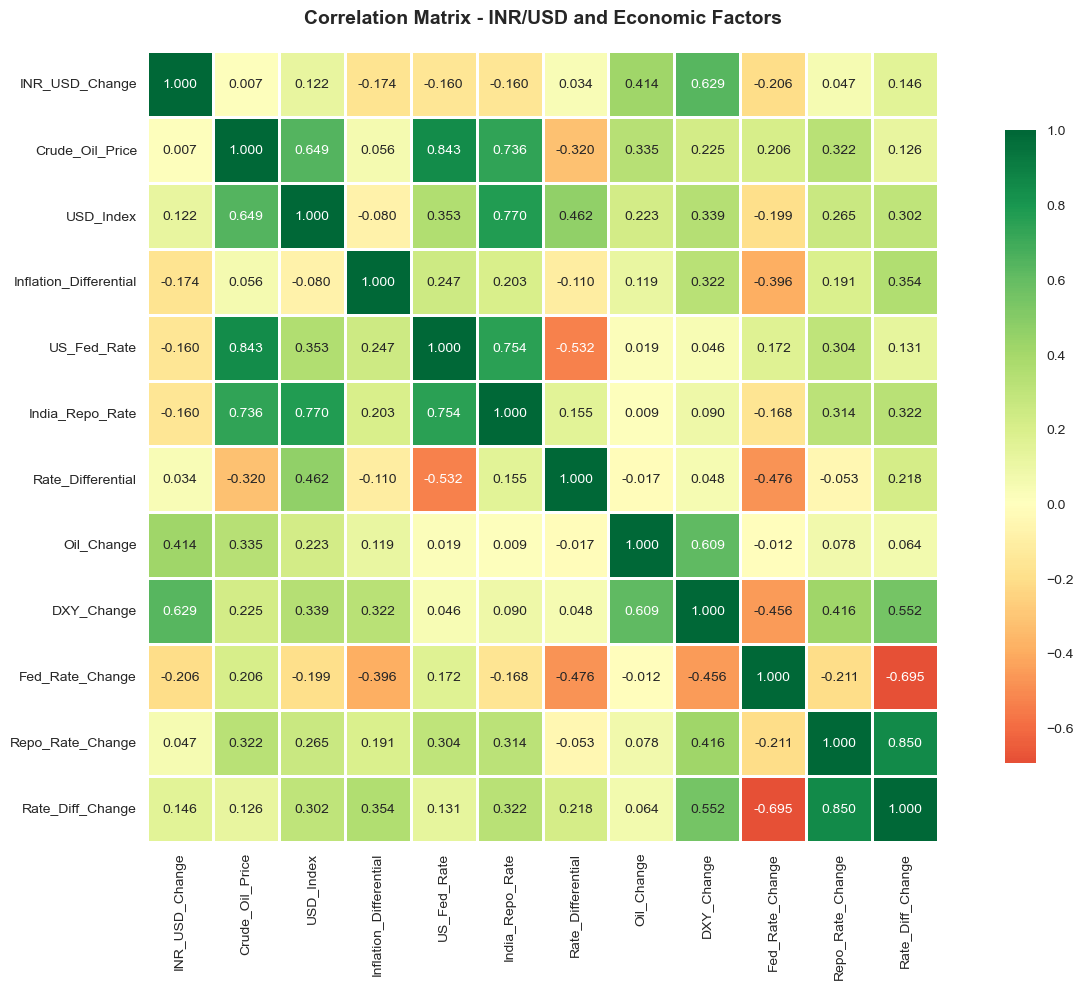

✅ Correlation heatmap created

📊 Creating scatter plots with trendlines...


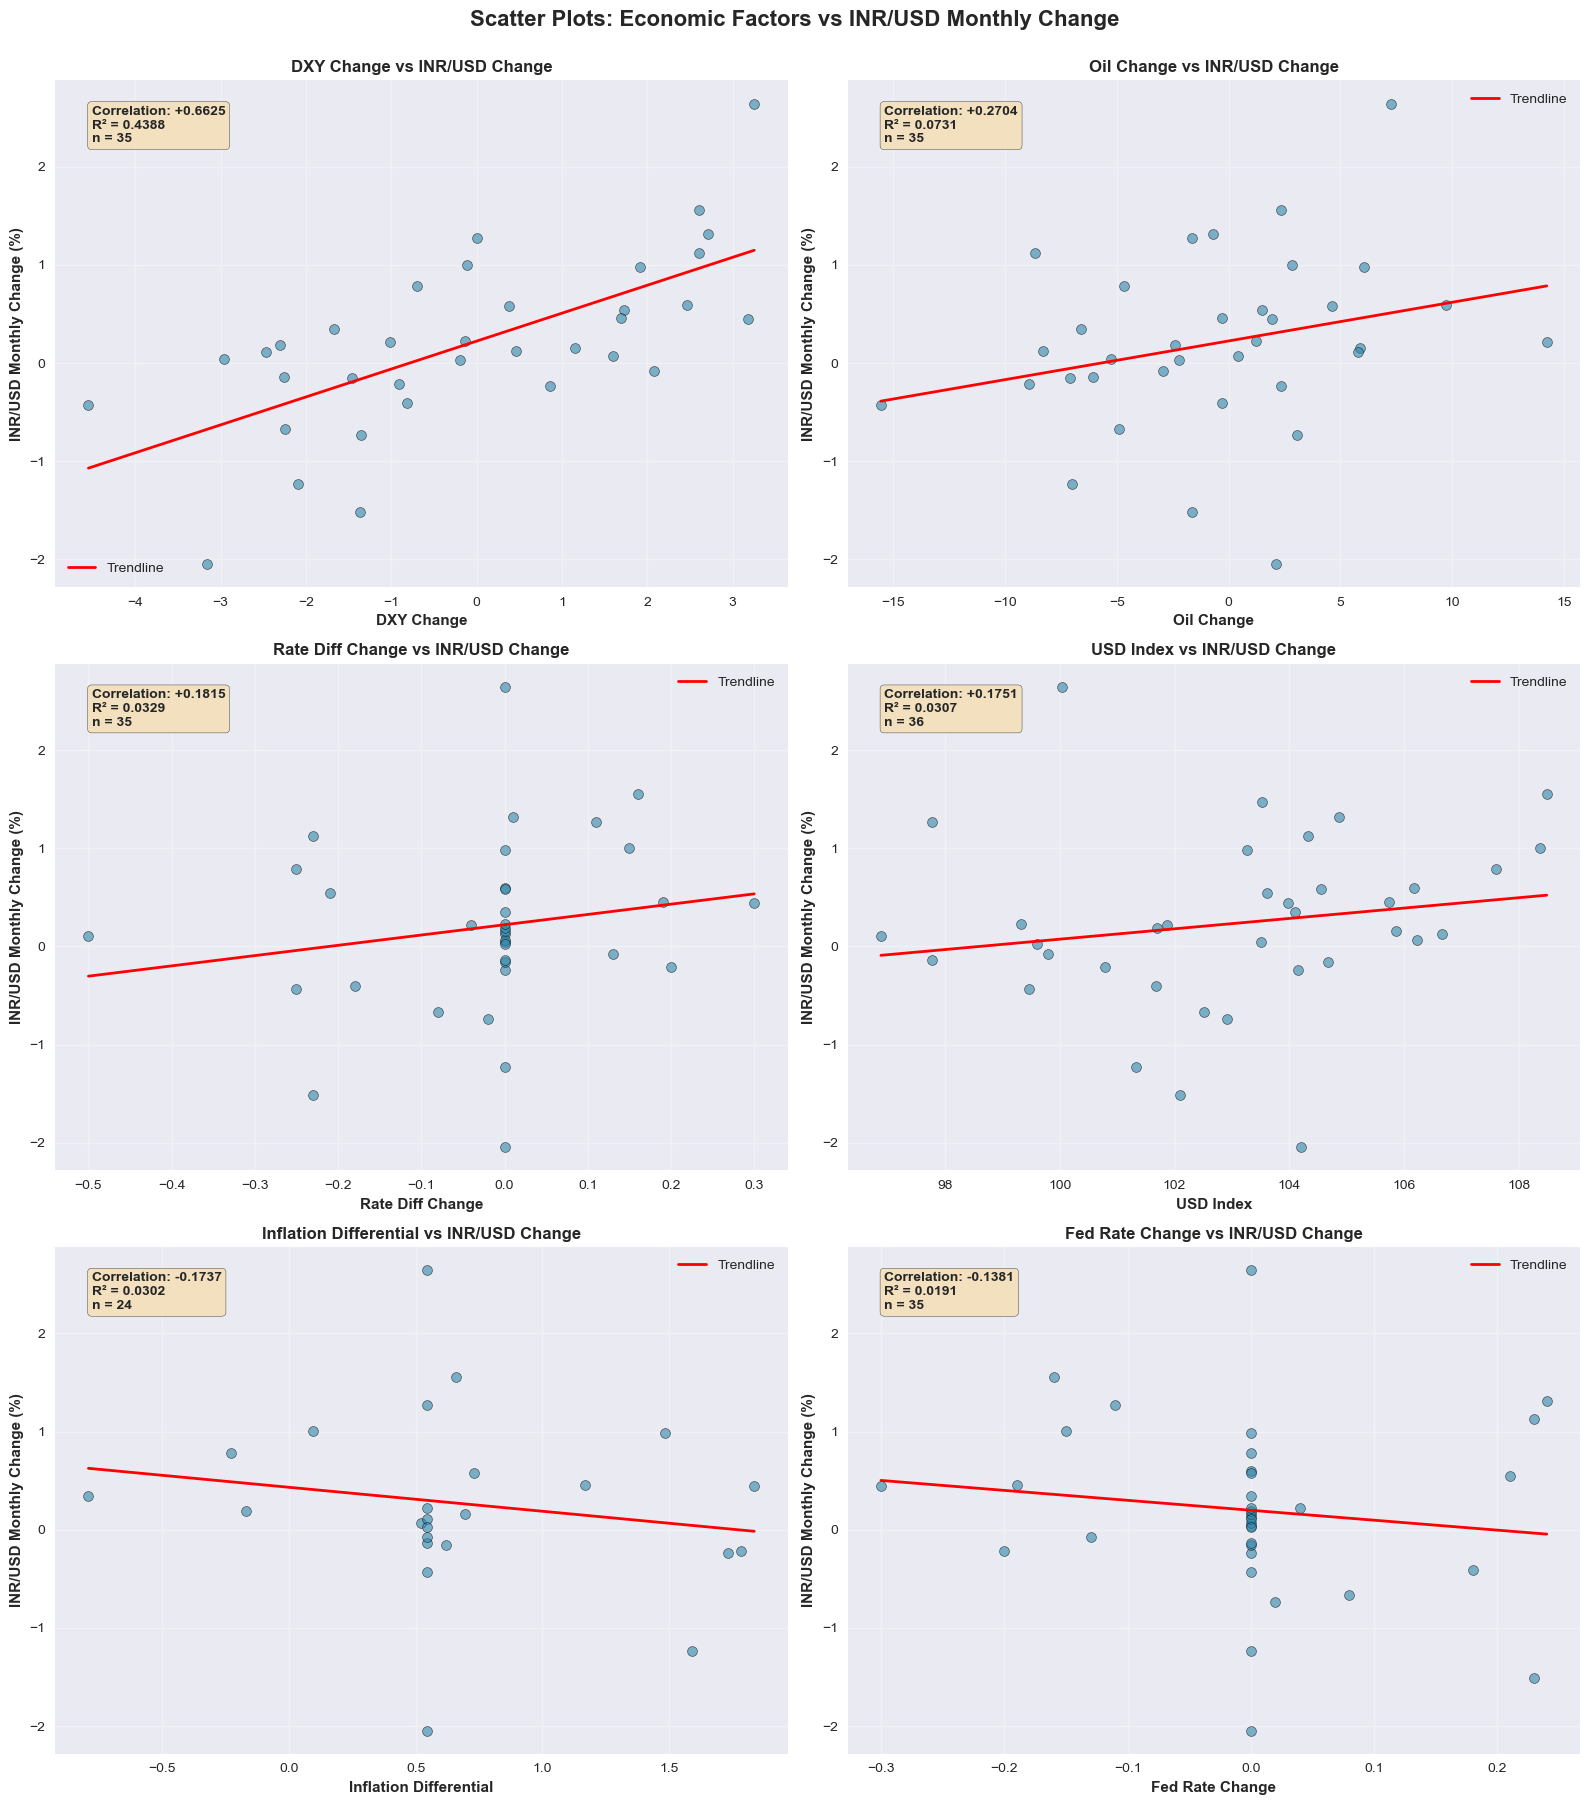

✅ Scatter plots created

📊 Creating time series comparison plots...


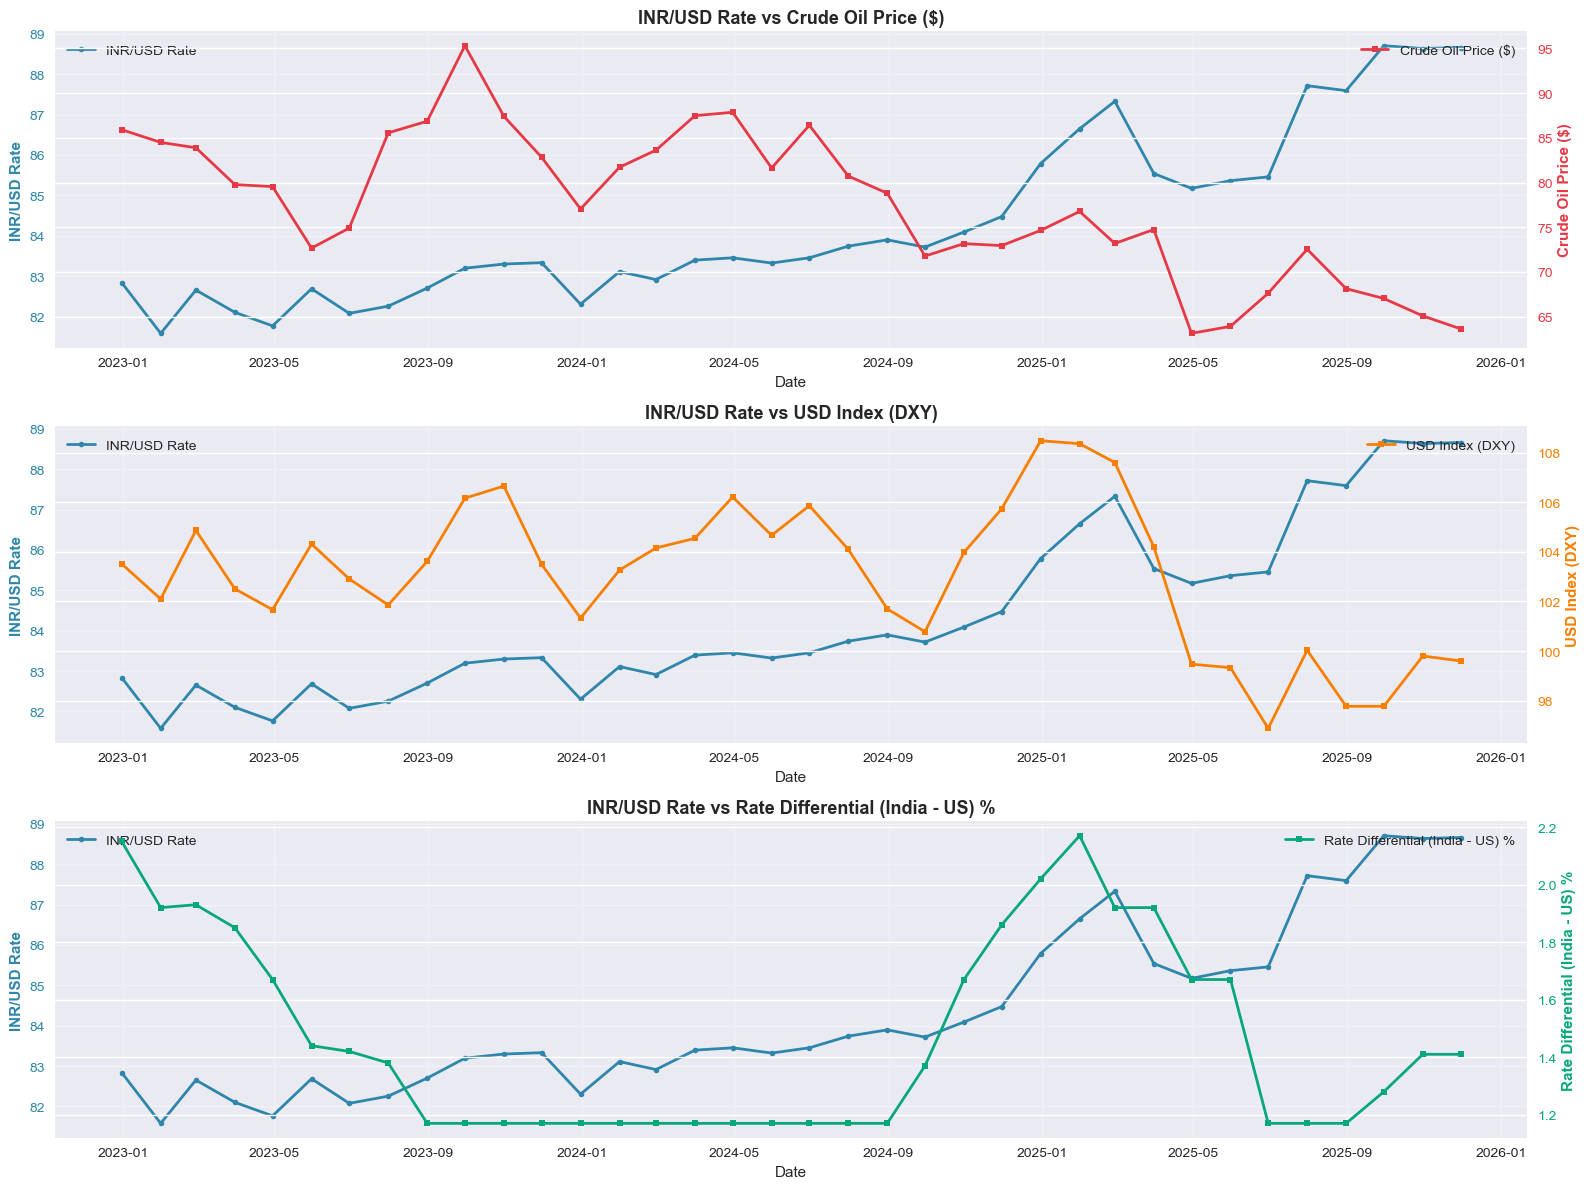

✅ Time series comparison plots created

✅ Correlation analysis completed successfully!


In [17]:
# STEP 3: CORRELATION ANALYSIS WITH SCATTER PLOTS
# ============================================================

print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Define the factors we want to correlate with INR/USD changes
# Only include factors that are actually present in the dataset
potential_factor_columns = ['Crude_Oil_Price', 'USD_Index', 'Inflation_Differential', 
                             'US_Fed_Rate', 'India_Repo_Rate', 'Rate_Differential']

potential_change_columns = ['Oil_Change', 'DXY_Change', 'Fed_Rate_Change', 
                            'Repo_Rate_Change', 'Rate_Diff_Change']

# Filter to only available columns
factor_columns = [col for col in potential_factor_columns if col in factors_df.columns]
change_columns = [col for col in potential_change_columns if col in factors_df.columns]

print(f"\n📊 Analyzing {len(factor_columns)} level factors and {len(change_columns)} change factors")
print(f"   Available factors: {', '.join(factor_columns)}")

# ============================================================
# Calculate correlations with INR/USD change
# ============================================================
print("\n📊 Correlation with INR/USD Monthly Change:")
print("-" * 60)

correlations = {}
for factor in factor_columns + change_columns:
    if factor in factors_df.columns:
        # Calculate correlation only on non-null values
        valid_data = factors_df[['INR_USD_Change', factor]].dropna()
        if len(valid_data) > 0:
            corr = valid_data['INR_USD_Change'].corr(valid_data[factor])
            correlations[factor] = corr
            
            # Interpretation
            if abs(corr) > 0.7:
                strength = "Very Strong"
            elif abs(corr) > 0.5:
                strength = "Strong"
            elif abs(corr) > 0.3:
                strength = "Moderate"
            elif abs(corr) > 0.1:
                strength = "Weak"
            else:
                strength = "Very Weak"
            
            direction = "Positive" if corr > 0 else "Negative"
            
            print(f"{factor:30s}: {corr:+.4f} ({strength} {direction}) [n={len(valid_data)}]")
        else:
            print(f"{factor:30s}: No valid data for correlation")

if len(correlations) == 0:
    print("\n❌ ERROR: No correlations could be calculated")
    print("   Please check that data collection was successful")
    raise ValueError("No correlations available")

# Sort correlations by absolute value
correlations_sorted = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

print("\n" + "="*80)
print(f"TOP {min(5, len(correlations_sorted))} MOST INFLUENTIAL FACTORS (by absolute correlation)")
print("="*80)

for i, (factor, corr) in enumerate(list(correlations_sorted.items())[:5], 1):
    print(f"{i}. {factor:30s}: {corr:+.4f}")

# ============================================================
# Create correlation heatmap
# ============================================================
print("\n📊 Creating correlation heatmap...")

# Select relevant columns for correlation matrix
corr_columns = ['INR_USD_Change'] + [col for col in factor_columns + change_columns if col in factors_df.columns]

# Remove columns with too many NaNs
corr_data = factors_df[corr_columns].dropna()

if len(corr_data) < 10:
    print(f"   ⚠️ Warning: Only {len(corr_data)} complete observations for correlation matrix")
    print("   Using all available data (some correlations may be based on partial data)")
    corr_matrix = factors_df[corr_columns].corr()
else:
    corr_matrix = corr_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - INR/USD and Economic Factors', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap created")

# ============================================================
# Create scatter plots with trendlines and R² values
# ============================================================
print("\n📊 Creating scatter plots with trendlines...")

# Select top factors with valid correlations
top_factors = [f for f in list(correlations_sorted.keys())[:6] if f in factors_df.columns]

if len(top_factors) == 0:
    print("   ⚠️ No factors available for scatter plots")
else:
    n_plots = len(top_factors)
    n_rows = (n_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for idx, factor in enumerate(top_factors):
        if idx >= len(axes):
            break
        
        ax = axes[idx]
        
        # Remove NaN values for clean plotting
        clean_data = factors_df[[factor, 'INR_USD_Change']].dropna()
        
        if len(clean_data) < 3:
            ax.text(0.5, 0.5, f'Insufficient data for {factor}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{factor.replace("_", " ")}', fontsize=12, fontweight='bold')
            continue
        
        # Scatter plot
        ax.scatter(clean_data[factor], clean_data['INR_USD_Change'], 
                  alpha=0.6, s=50, color='#2E86AB', edgecolors='black', linewidth=0.5)
        
        # Calculate trendline
        z = np.polyfit(clean_data[factor], clean_data['INR_USD_Change'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(clean_data[factor].min(), clean_data[factor].max(), 100)
        ax.plot(x_trend, p(x_trend), "r-", linewidth=2, label='Trendline')
        
        # Calculate R²
        y_pred = p(clean_data[factor])
        ss_res = np.sum((clean_data['INR_USD_Change'] - y_pred) ** 2)
        ss_tot = np.sum((clean_data['INR_USD_Change'] - clean_data['INR_USD_Change'].mean()) ** 2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
        
        # Get correlation
        corr = correlations.get(factor, 0)
        
        # Add statistics to plot
        textstr = f'Correlation: {corr:+.4f}\nR² = {r_squared:.4f}\nn = {len(clean_data)}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props, fontweight='bold')
        
        ax.set_xlabel(factor.replace('_', ' '), fontsize=11, fontweight='bold')
        ax.set_ylabel('INR/USD Monthly Change (%)', fontsize=11, fontweight='bold')
        ax.set_title(f'{factor.replace("_", " ")} vs INR/USD Change', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # Hide unused subplots
    for idx in range(len(top_factors), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Scatter Plots: Economic Factors vs INR/USD Monthly Change', 
                 fontsize=16, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()
    
    print("✅ Scatter plots created")

# ============================================================
# Create time series comparison plots
# ============================================================
print("\n📊 Creating time series comparison plots...")

# Only plot if we have the required data
plots_to_create = []
if 'Crude_Oil_Price' in factors_df.columns:
    plots_to_create.append(('Crude_Oil_Price', 'Crude Oil Price ($)', '#E63946'))
if 'USD_Index' in factors_df.columns:
    plots_to_create.append(('USD_Index', 'USD Index (DXY)', '#F77F00'))
if 'Rate_Differential' in factors_df.columns:
    plots_to_create.append(('Rate_Differential', 'Rate Differential (India - US) %', '#06A77D'))

if len(plots_to_create) > 0:
    n_plots = len(plots_to_create)
    fig, axes = plt.subplots(n_plots, 1, figsize=(16, 4*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for idx, (factor_col, label, color) in enumerate(plots_to_create):
        ax = axes[idx]
        ax_twin = ax.twinx()
        
        # Plot INR/USD Rate
        ax.plot(factors_df.index, factors_df['INR_USD_Rate'], 
                color='#2E86AB', linewidth=2, marker='o', markersize=4, label='INR/USD Rate')
        
        # Plot factor on twin axis
        ax_twin.plot(factors_df.index, factors_df[factor_col], 
                    color=color, linewidth=2, marker='s', markersize=4, label=label)
        
        ax.set_xlabel('Date', fontsize=11)
        ax.set_ylabel('INR/USD Rate', fontsize=11, color='#2E86AB', fontweight='bold')
        ax_twin.set_ylabel(label, fontsize=11, color=color, fontweight='bold')
        ax.set_title(f'INR/USD Rate vs {label}', fontsize=13, fontweight='bold')
        ax.tick_params(axis='y', labelcolor='#2E86AB')
        ax_twin.tick_params(axis='y', labelcolor=color)
        ax.legend(loc='upper left')
        ax_twin.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Time series comparison plots created")
else:
    print("   ⚠️ Insufficient data for time series comparison plots")

print("\n✅ Correlation analysis completed successfully!")

MULTIPLE LINEAR REGRESSION ANALYSIS

📌 Preparing data for regression model...
   Using 4 predictors: Crude_Oil_Price, USD_Index, Inflation_Differential, Rate_Differential
   Dataset size: 24 observations
   Predictors: 4
   Target variable: INR/USD Monthly Change

   Training set: 20 observations (85%)
   Testing set: 4 observations (15%)

📌 Training Multiple Linear Regression model...
   ✅ Model trained successfully

MODEL COEFFICIENTS

Intercept: -15.1874

Coefficients:
------------------------------------------------------------
Rate_Differential             : -2.004314
USD_Index                     : +0.256073
Crude_Oil_Price               : -0.105047
Inflation_Differential        : -0.058846

📊 Interpretation:
------------------------------------------------------------
• When Rate_Differential increases by 1 unit, INR/USD change decreases by 2.0043%
• When USD_Index increases by 1 unit, INR/USD change increases by 0.2561%
• When Crude_Oil_Price increases by 1 unit, INR/USD change

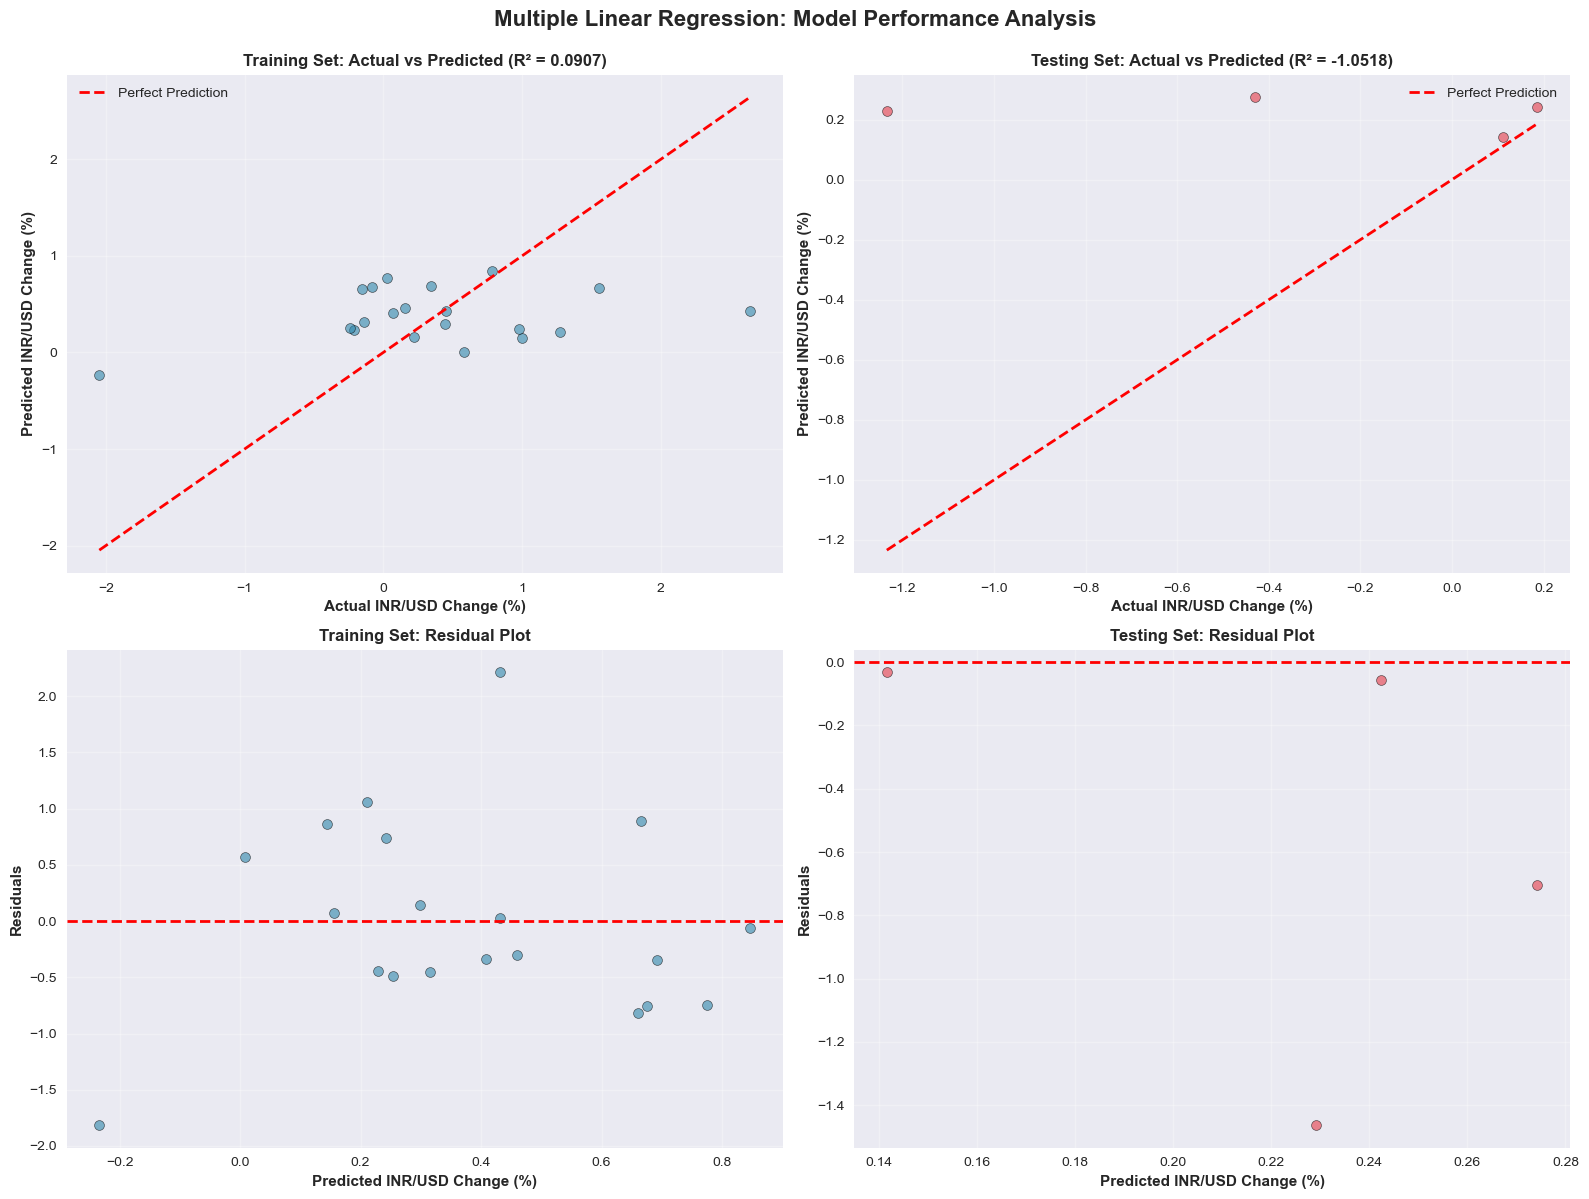

   ✅ Regression visualizations created

FEATURE IMPORTANCE (Standardized Coefficients)


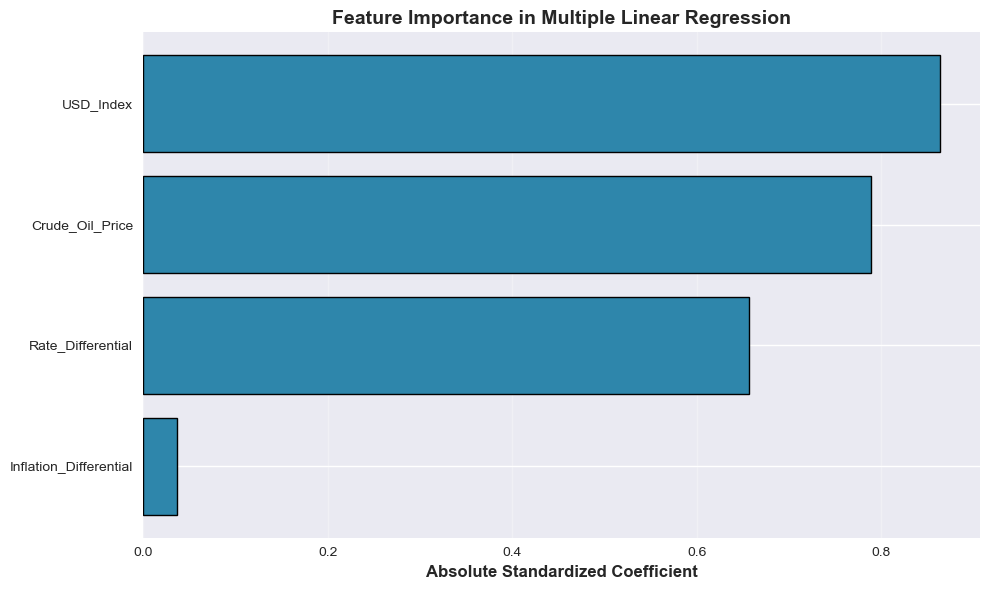


Feature Importance Ranking:
------------------------------------------------------------
USD_Index                     : 0.8637
Crude_Oil_Price               : 0.7886
Rate_Differential             : 0.6561
Inflation_Differential        : 0.0373

✅ Multiple Linear Regression analysis completed!


In [18]:
# STEP 4: MULTIPLE LINEAR REGRESSION MODEL
# ============================================================

print("="*80)
print("MULTIPLE LINEAR REGRESSION ANALYSIS")
print("="*80)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats

# ============================================================
# Prepare data for regression
# ============================================================
print("\n📌 Preparing data for regression model...")

# Select independent variables (predictors) - only use available ones
potential_predictors = ['Crude_Oil_Price', 'USD_Index', 'Inflation_Differential', 'Rate_Differential']
predictor_columns = [col for col in potential_predictors if col in factors_df.columns]

if len(predictor_columns) == 0:
    print("\n❌ ERROR: No predictor variables available")
    print("   Cannot perform regression analysis")
    print("   Please ensure data collection was successful")
else:
    print(f"   Using {len(predictor_columns)} predictors: {', '.join(predictor_columns)}")
    
    # Prepare clean dataset (remove any rows with missing values)
    regression_cols = predictor_columns + ['INR_USD_Change']
    regression_data = factors_df[regression_cols].dropna()
    
    if len(regression_data) < 20:
        print(f"\n⚠️ WARNING: Only {len(regression_data)} complete observations available")
        print("   Minimum 20 observations recommended for reliable regression")
        print("   Results may not be robust")
    
    X = regression_data[predictor_columns]
    y = regression_data['INR_USD_Change']
    
    print(f"   Dataset size: {len(regression_data)} observations")
    print(f"   Predictors: {len(predictor_columns)}")
    print(f"   Target variable: INR/USD Monthly Change")
    
    # ============================================================
    # Split data into training and testing sets
    # ============================================================
    if len(regression_data) < 10:
        print(f"\n❌ ERROR: Insufficient data ({len(regression_data)} obs) for train/test split")
        print("   Need at least 10 observations")
    else:
        # Adjust test size based on available data
        test_size = 0.2 if len(regression_data) >= 30 else 0.15
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        print(f"\n   Training set: {len(X_train)} observations ({(1-test_size)*100:.0f}%)")
        print(f"   Testing set: {len(X_test)} observations ({test_size*100:.0f}%)")
        
        # ============================================================
        # Train the model
        # ============================================================
        print("\n📌 Training Multiple Linear Regression model...")
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        print("   ✅ Model trained successfully")
        
        # ============================================================
        # Model coefficients and interpretation
        # ============================================================
        print("\n" + "="*80)
        print("MODEL COEFFICIENTS")
        print("="*80)
        
        print(f"\nIntercept: {model.intercept_:.4f}")
        print("\nCoefficients:")
        print("-" * 60)
        
        coefficients = pd.DataFrame({
            'Factor': predictor_columns,
            'Coefficient': model.coef_,
            'Abs_Coefficient': np.abs(model.coef_)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        for idx, row in coefficients.iterrows():
            print(f"{row['Factor']:30s}: {row['Coefficient']:+.6f}")
        
        print("\n📊 Interpretation:")
        print("-" * 60)
        for idx, row in coefficients.iterrows():
            factor = row['Factor']
            coef = row['Coefficient']
            direction = "increases" if coef > 0 else "decreases"
            print(f"• When {factor} increases by 1 unit, INR/USD change {direction} by {abs(coef):.4f}%")
        
        # ============================================================
        # Model performance
        # ============================================================
        print("\n" + "="*80)
        print("MODEL PERFORMANCE")
        print("="*80)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training metrics
        r2_train = r2_score(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        
        # Testing metrics
        r2_test = r2_score(y_test, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_test = mean_absolute_error(y_test, y_test_pred)
        
        print("\n📊 Training Set Performance:")
        print(f"   R² Score: {r2_train:.4f} ({r2_train*100:.2f}% variance explained)")
        print(f"   RMSE: {rmse_train:.4f}%")
        print(f"   MAE: {mae_train:.4f}%")
        
        print("\n📊 Testing Set Performance:")
        print(f"   R² Score: {r2_test:.4f} ({r2_test*100:.2f}% variance explained)")
        print(f"   RMSE: {rmse_test:.4f}%")
        print(f"   MAE: {mae_test:.4f}%")
        
        # Model interpretation
        print("\n📝 Model Interpretation:")
        if r2_test > 0.7:
            print("   ✅ Excellent fit - Model explains >70% of variance")
        elif r2_test > 0.5:
            print("   ✅ Good fit - Model explains >50% of variance")
        elif r2_test > 0.3:
            print("   ⚠️ Moderate fit - Model explains >30% of variance")
        else:
            print("   ⚠️ Weak fit - Model explains <30% of variance")
        
        if abs(r2_train - r2_test) < 0.1:
            print("   ✅ Model generalizes well (no overfitting)")
        else:
            print("   ⚠️ Possible overfitting detected")
        
        # ============================================================
        # Visualizations
        # ============================================================
        print("\n📊 Creating regression visualizations...")
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Plot 1: Actual vs Predicted (Training)
        ax1 = axes[0, 0]
        ax1.scatter(y_train, y_train_pred, alpha=0.6, s=50, color='#2E86AB', edgecolors='black', linewidth=0.5)
        ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                 'r--', lw=2, label='Perfect Prediction')
        ax1.set_xlabel('Actual INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax1.set_title(f'Training Set: Actual vs Predicted (R² = {r2_train:.4f})', fontsize=12, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Actual vs Predicted (Testing)
        ax2 = axes[0, 1]
        ax2.scatter(y_test, y_test_pred, alpha=0.6, s=50, color='#E63946', edgecolors='black', linewidth=0.5)
        ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                 'r--', lw=2, label='Perfect Prediction')
        ax2.set_xlabel('Actual INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax2.set_title(f'Testing Set: Actual vs Predicted (R² = {r2_test:.4f})', fontsize=12, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Residuals (Training)
        residuals_train = y_train - y_train_pred
        ax3 = axes[1, 0]
        ax3.scatter(y_train_pred, residuals_train, alpha=0.6, s=50, color='#2E86AB', edgecolors='black', linewidth=0.5)
        ax3.axhline(y=0, color='r', linestyle='--', lw=2)
        ax3.set_xlabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Residuals', fontsize=11, fontweight='bold')
        ax3.set_title('Training Set: Residual Plot', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Residuals (Testing)
        residuals_test = y_test - y_test_pred
        ax4 = axes[1, 1]
        ax4.scatter(y_test_pred, residuals_test, alpha=0.6, s=50, color='#E63946', edgecolors='black', linewidth=0.5)
        ax4.axhline(y=0, color='r', linestyle='--', lw=2)
        ax4.set_xlabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
        ax4.set_ylabel('Residuals', fontsize=11, fontweight='bold')
        ax4.set_title('Testing Set: Residual Plot', fontsize=12, fontweight='bold')
        ax4.grid(True, alpha=0.3)
        
        plt.suptitle('Multiple Linear Regression: Model Performance Analysis', 
                     fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("   ✅ Regression visualizations created")
        
        # ============================================================
        # Feature importance (based on standardized coefficients)
        # ============================================================
        print("\n" + "="*80)
        print("FEATURE IMPORTANCE (Standardized Coefficients)")
        print("="*80)
        
        # Standardize the features
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=test_size, random_state=42)
        
        # Train on standardized data
        model_scaled = LinearRegression()
        model_scaled.fit(X_train_scaled, y_train)
        
        # Create feature importance plot
        feature_importance = pd.DataFrame({
            'Factor': predictor_columns,
            'Importance': np.abs(model_scaled.coef_)
        }).sort_values('Importance', ascending=True)
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance['Factor'], feature_importance['Importance'], 
                 color='#2E86AB', edgecolor='black', linewidth=1)
        plt.xlabel('Absolute Standardized Coefficient', fontsize=12, fontweight='bold')
        plt.title('Feature Importance in Multiple Linear Regression', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print("\nFeature Importance Ranking:")
        print("-" * 60)
        for idx, row in feature_importance.sort_values('Importance', ascending=False).iterrows():
            print(f"{row['Factor']:30s}: {row['Importance']:.4f}")
        
        print("\n✅ Multiple Linear Regression analysis completed!")

RANDOM FOREST REGRESSION ANALYSIS

📌 Training Random Forest Regressor...
   Using 4 predictors
   Training samples: 20
   ✅ Random Forest model trained successfully
   Number of trees: 200
   Max depth: 10

RANDOM FOREST MODEL PERFORMANCE

📊 Training Set Performance:
   R² Score: 0.4844 (48.44% variance explained)
   RMSE: 0.6414%
   MAE: 0.4378%

📊 Testing Set Performance:
   R² Score: -1.9720 (-197.20% variance explained)
   RMSE: 0.9779%
   MAE: 0.7942%

📊 Comparison with Linear Regression:
------------------------------------------------------------
Metric               Linear Reg      Random Forest   Winner
------------------------------------------------------------
R² (Test)            -1.0518         -1.9720         Linear Reg
RMSE (Test)          0.8125          0.9779          Linear Reg
MAE (Test)           0.5637          0.7942          Linear Reg

FEATURE IMPORTANCE ANALYSIS (Random Forest)

📊 Feature Importance Rankings:
--------------------------------------------------

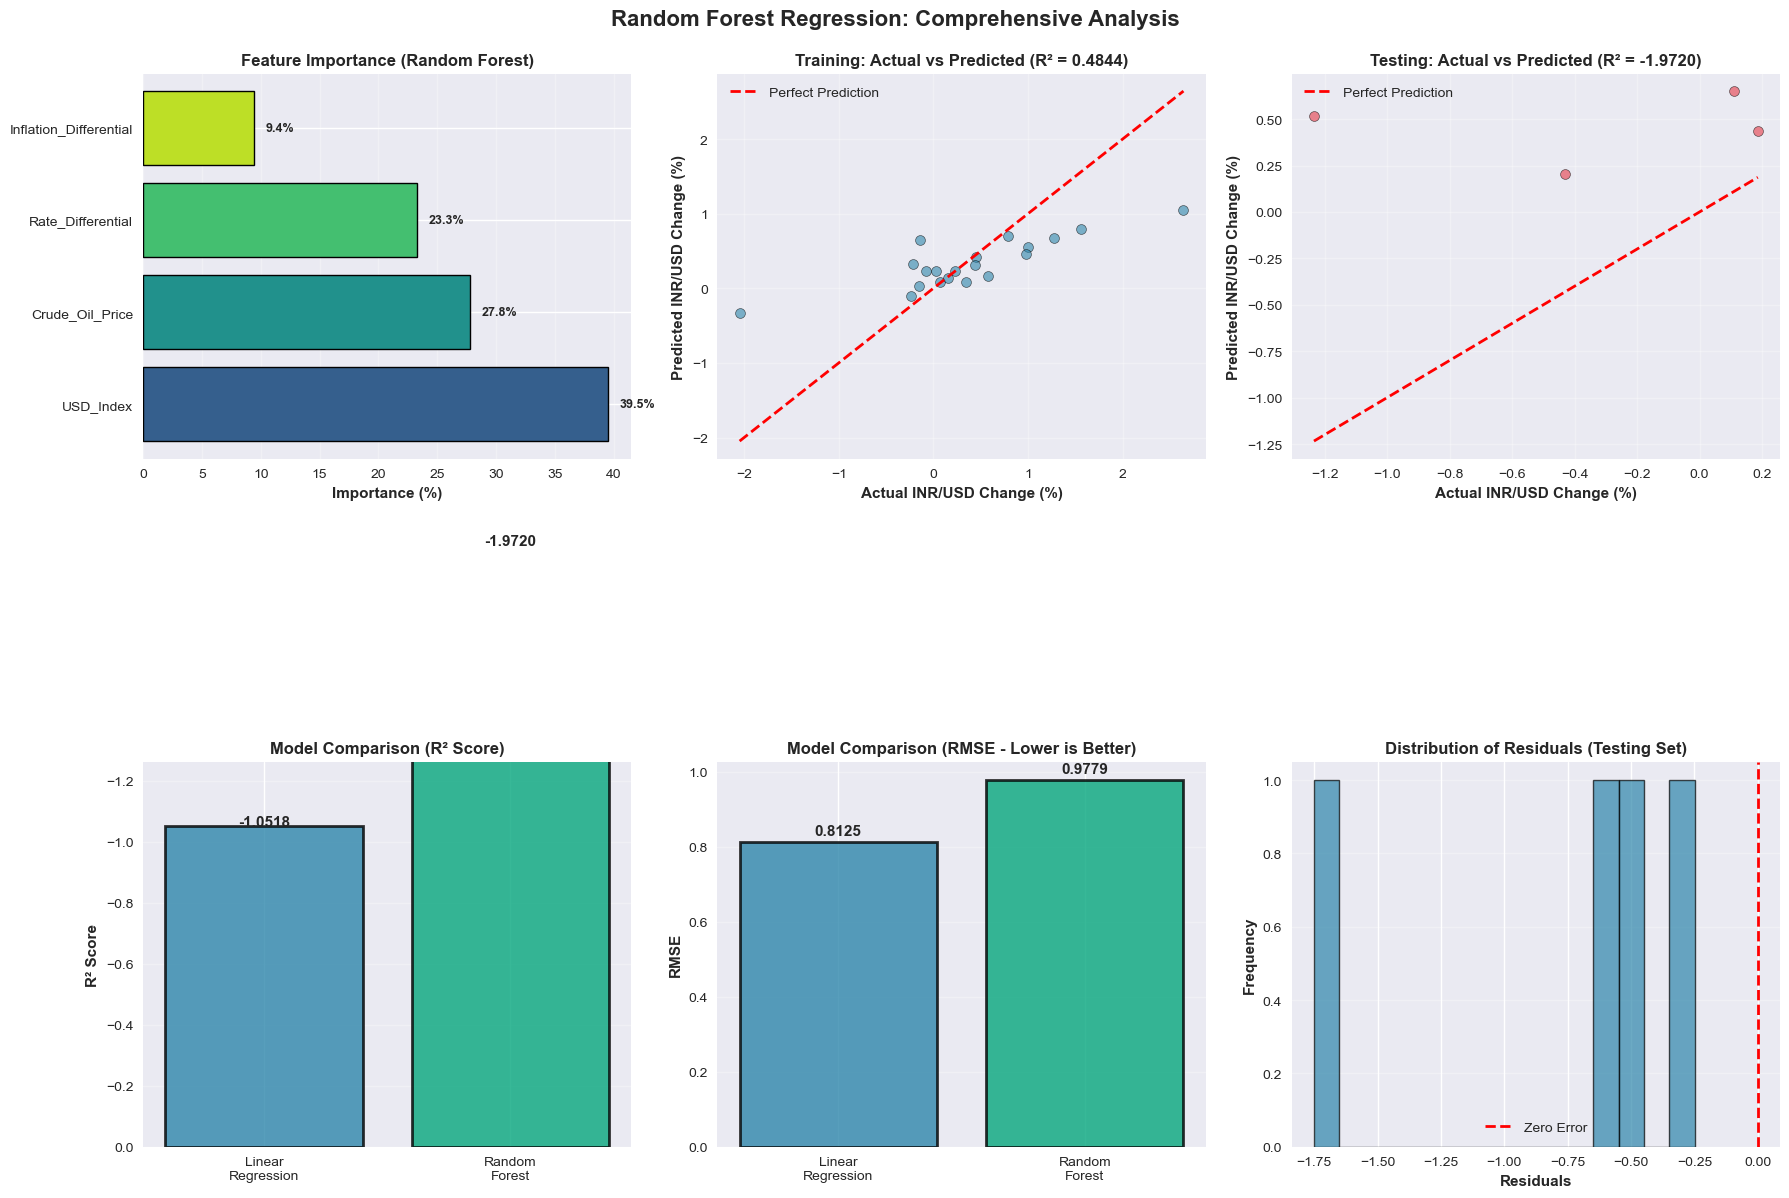

   ✅ Random Forest visualizations created

SUMMARY AND RECOMMENDATIONS

📊 Best Performing Model:
   🏆 Linear Regression (R² = -1.0518) outperforms Random Forest (R² = -1.9720)

📊 Most Important Factors (Top 3):
   USD_Index                     : 39.52% importance
   Crude_Oil_Price               : 27.80% importance
   Rate_Differential             : 23.28% importance

✅ Random Forest Regression analysis completed!


In [19]:
# STEP 5: RANDOM FOREST REGRESSION WITH FEATURE IMPORTANCE
# ============================================================

print("="*80)
print("RANDOM FOREST REGRESSION ANALYSIS")
print("="*80)

from sklearn.ensemble import RandomForestRegressor

# Check if we have the required data from previous step
if 'predictor_columns' not in locals() or len(predictor_columns) == 0:
    print("\n❌ ERROR: No predictors available from previous step")
    print("   Please run the Linear Regression cell first")
elif 'X_train' not in locals():
    print("\n❌ ERROR: Training data not available")
    print("   Please run the Linear Regression cell first")
else:
    # ============================================================
    # Train Random Forest model
    # ============================================================
    print("\n📌 Training Random Forest Regressor...")
    print(f"   Using {len(predictor_columns)} predictors")
    print(f"   Training samples: {len(X_train)}")
    
    # Use the same train-test split as before
    rf_model = RandomForestRegressor(
        n_estimators=200,          # Number of trees
        max_depth=10,              # Maximum depth of trees
        min_samples_split=5,       # Minimum samples to split a node
        min_samples_leaf=2,        # Minimum samples in leaf node
        random_state=42,
        n_jobs=-1                  # Use all CPU cores
    )
    
    rf_model.fit(X_train, y_train)
    
    print("   ✅ Random Forest model trained successfully")
    print(f"   Number of trees: {rf_model.n_estimators}")
    print(f"   Max depth: {rf_model.max_depth}")
    
    # ============================================================
    # Model performance
    # ============================================================
    print("\n" + "="*80)
    print("RANDOM FOREST MODEL PERFORMANCE")
    print("="*80)
    
    # Predictions
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    
    # Training metrics
    r2_train_rf = r2_score(y_train, y_train_pred_rf)
    rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
    
    # Testing metrics
    r2_test_rf = r2_score(y_test, y_test_pred_rf)
    rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
    
    print("\n📊 Training Set Performance:")
    print(f"   R² Score: {r2_train_rf:.4f} ({r2_train_rf*100:.2f}% variance explained)")
    print(f"   RMSE: {rmse_train_rf:.4f}%")
    print(f"   MAE: {mae_train_rf:.4f}%")
    
    print("\n📊 Testing Set Performance:")
    print(f"   R² Score: {r2_test_rf:.4f} ({r2_test_rf*100:.2f}% variance explained)")
    print(f"   RMSE: {rmse_test_rf:.4f}%")
    print(f"   MAE: {mae_test_rf:.4f}%")
    
    # Compare with Linear Regression
    print("\n📊 Comparison with Linear Regression:")
    print("-" * 60)
    print(f"{'Metric':<20} {'Linear Reg':<15} {'Random Forest':<15} {'Winner'}")
    print("-" * 60)
    
    metrics_comparison = [
        ('R² (Test)', r2_test, r2_test_rf),
        ('RMSE (Test)', rmse_test, rmse_test_rf),
        ('MAE (Test)', mae_test, mae_test_rf)
    ]
    
    for metric_name, lr_val, rf_val in metrics_comparison:
        if metric_name.startswith('R²'):
            winner = 'Random Forest' if rf_val > lr_val else 'Linear Reg'
        else:
            winner = 'Random Forest' if rf_val < lr_val else 'Linear Reg'
        print(f"{metric_name:<20} {lr_val:<15.4f} {rf_val:<15.4f} {winner}")
    
    # ============================================================
    # Feature Importance from Random Forest
    # ============================================================
    print("\n" + "="*80)
    print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
    print("="*80)
    
    # Get feature importances
    feature_importance_rf = pd.DataFrame({
        'Factor': predictor_columns,
        'Importance': rf_model.feature_importances_,
        'Importance_Pct': rf_model.feature_importances_ * 100
    }).sort_values('Importance', ascending=False)
    
    print("\n📊 Feature Importance Rankings:")
    print("-" * 60)
    for idx, row in feature_importance_rf.iterrows():
        bar = '█' * int(row['Importance_Pct'] / 2)
        print(f"{row['Factor']:30s}: {row['Importance_Pct']:6.2f}% {bar}")
    
    print("\n📝 Key Insights:")
    most_important = feature_importance_rf.iloc[0]
    print(f"   • Most influential factor: {most_important['Factor']} ({most_important['Importance_Pct']:.2f}%)")
    if len(feature_importance_rf) >= 2:
        print(f"   • Top 2 factors account for: {feature_importance_rf.head(2)['Importance_Pct'].sum():.2f}% of influence")
    
    # ============================================================
    # Visualizations
    # ============================================================
    print("\n📊 Creating Random Forest visualizations...")
    
    fig = plt.figure(figsize=(18, 12))
    
    # Plot 1: Feature Importance
    ax1 = plt.subplot(2, 3, 1)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance_rf)))
    bars = ax1.barh(feature_importance_rf['Factor'], feature_importance_rf['Importance_Pct'], 
                    color=colors, edgecolor='black', linewidth=1)
    ax1.set_xlabel('Importance (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Feature Importance (Random Forest)', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, feature_importance_rf['Importance_Pct'])):
        ax1.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                va='center', fontsize=9, fontweight='bold')
    
    # Plot 2: Actual vs Predicted (Training)
    ax2 = plt.subplot(2, 3, 2)
    ax2.scatter(y_train, y_train_pred_rf, alpha=0.6, s=50, color='#2E86AB', edgecolors='black', linewidth=0.5)
    ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
    ax2.set_xlabel('Actual INR/USD Change (%)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
    ax2.set_title(f'Training: Actual vs Predicted (R² = {r2_train_rf:.4f})', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Actual vs Predicted (Testing)
    ax3 = plt.subplot(2, 3, 3)
    ax3.scatter(y_test, y_test_pred_rf, alpha=0.6, s=50, color='#E63946', edgecolors='black', linewidth=0.5)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
    ax3.set_xlabel('Actual INR/USD Change (%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Predicted INR/USD Change (%)', fontsize=11, fontweight='bold')
    ax3.set_title(f'Testing: Actual vs Predicted (R² = {r2_test_rf:.4f})', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Model Comparison
    ax4 = plt.subplot(2, 3, 4)
    models = ['Linear\nRegression', 'Random\nForest']
    r2_scores = [r2_test, r2_test_rf]
    colors_bar = ['#2E86AB', '#06A77D']
    bars = ax4.bar(models, r2_scores, color=colors_bar, edgecolor='black', linewidth=2, alpha=0.8)
    ax4.set_ylabel('R² Score', fontsize=11, fontweight='bold')
    ax4.set_title('Model Comparison (R² Score)', fontsize=12, fontweight='bold')
    ax4.set_ylim(0, max(r2_scores) * 1.2)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, val in zip(bars, r2_scores):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 5: RMSE Comparison
    ax5 = plt.subplot(2, 3, 5)
    rmse_scores = [rmse_test, rmse_test_rf]
    bars = ax5.bar(models, rmse_scores, color=colors_bar, edgecolor='black', linewidth=2, alpha=0.8)
    ax5.set_ylabel('RMSE', fontsize=11, fontweight='bold')
    ax5.set_title('Model Comparison (RMSE - Lower is Better)', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, val in zip(bars, rmse_scores):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 6: Residuals Distribution
    ax6 = plt.subplot(2, 3, 6)
    residuals_rf = y_test - y_test_pred_rf
    ax6.hist(residuals_rf, bins=15, color='#2E86AB', edgecolor='black', linewidth=1, alpha=0.7)
    ax6.axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
    ax6.set_xlabel('Residuals', fontsize=11, fontweight='bold')
    ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax6.set_title('Distribution of Residuals (Testing Set)', fontsize=12, fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Random Forest Regression: Comprehensive Analysis', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print("   ✅ Random Forest visualizations created")
    
    # ============================================================
    # Summary and Recommendations
    # ============================================================
    print("\n" + "="*80)
    print("SUMMARY AND RECOMMENDATIONS")
    print("="*80)
    
    print("\n📊 Best Performing Model:")
    if r2_test_rf > r2_test:
        print(f"   🏆 Random Forest (R² = {r2_test_rf:.4f}) outperforms Linear Regression (R² = {r2_test:.4f})")
        improvement = ((r2_test_rf - r2_test) / max(r2_test, 0.01)) * 100
        print(f"   Improvement: {improvement:.2f}%")
    else:
        print(f"   🏆 Linear Regression (R² = {r2_test:.4f}) outperforms Random Forest (R² = {r2_test_rf:.4f})")
    
    print(f"\n📊 Most Important Factors (Top {min(3, len(feature_importance_rf))}):")
    for i, row in feature_importance_rf.head(3).iterrows():
        print(f"   {row['Factor']:30s}: {row['Importance_Pct']:.2f}% importance")
    
    print("\n✅ Random Forest Regression analysis completed!")

GRANGER CAUSALITY ANALYSIS

📝 What is Granger Causality?
------------------------------------------------------------
Granger Causality tests whether past values of one time series
can predict future values of another time series.
If Factor X 'Granger-causes' Y, it means X contains useful
information for predicting Y beyond what Y's own history provides.

Note: 'Granger-cause' means predictive power, not true causation.

📌 Preparing data for Granger Causality tests...
   Testing 4 available factors
   Factors: Oil_Change, DXY_Change, Rate_Differential, Inflation_Differential
   Clean dataset: 24 observations

GRANGER CAUSALITY TEST RESULTS

Testing if each factor Granger-causes INR/USD changes...
Max lag tested: 3 months
--------------------------------------------------------------------------------

🔍 Testing: Oil_Change → INR/USD Change
------------------------------------------------------------
   Lag 1: p-value = 0.4487 (Not Significant)
   Lag 2: p-value = 0.5630 (Not Significan

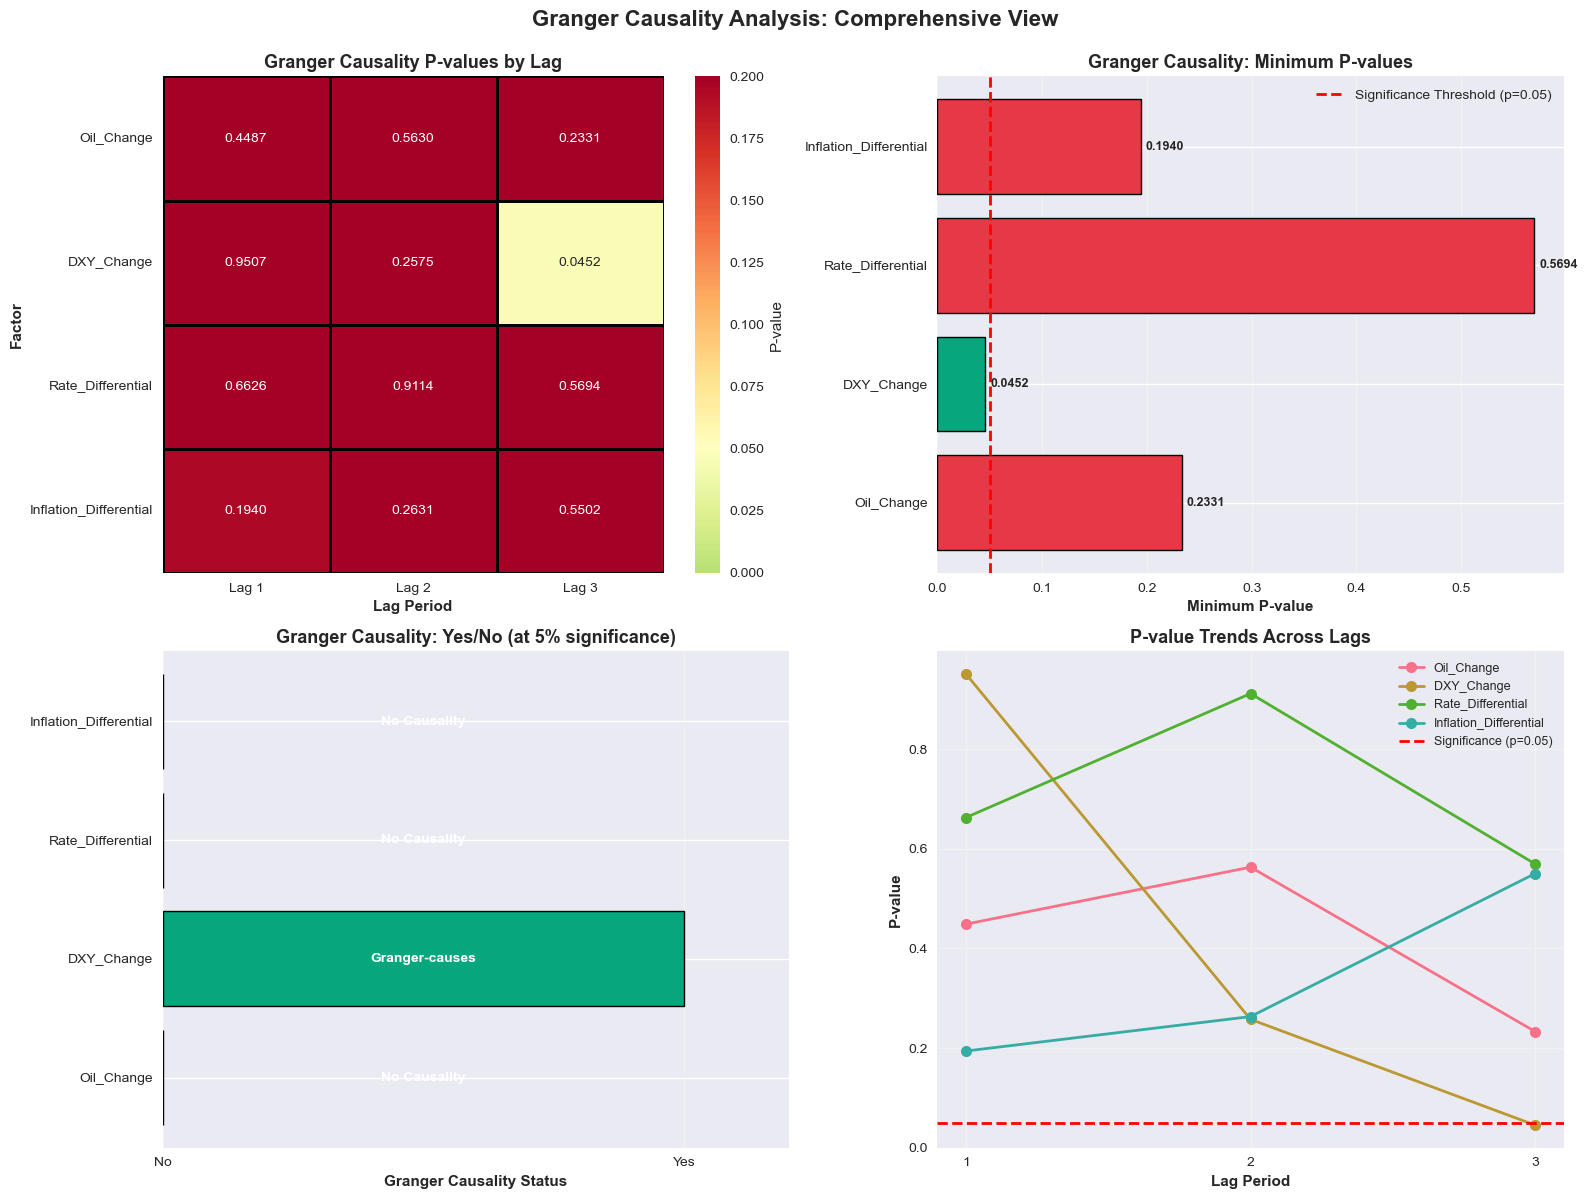

   ✅ Granger Causality visualizations created

PRACTICAL INTERPRETATION

📝 What This Means for Prediction:
------------------------------------------------------------

✅ Predictive Factors (Can help forecast INR/USD):
   • DXY_Change
     → Past values can predict future INR/USD movements

❌ Non-Predictive Factors (Weak forecasting power):
   • Inflation_Differential
     → Past values don't significantly predict INR/USD movements
   • Oil_Change
     → Past values don't significantly predict INR/USD movements
   • Rate_Differential
     → Past values don't significantly predict INR/USD movements

💡 Key Takeaway:
   Granger causality identifies which factors have predictive power
   for INR/USD movements, helping prioritize indicators for forecasting.

✅ Granger Causality analysis completed!


In [20]:
# STEP 6: GRANGER CAUSALITY ANALYSIS
# ============================================================

print("="*80)
print("GRANGER CAUSALITY ANALYSIS")
print("="*80)

print("\n📝 What is Granger Causality?")
print("-" * 60)
print("Granger Causality tests whether past values of one time series")
print("can predict future values of another time series.")
print("If Factor X 'Granger-causes' Y, it means X contains useful")
print("information for predicting Y beyond what Y's own history provides.")
print("\nNote: 'Granger-cause' means predictive power, not true causation.")

# ============================================================
# Prepare data for Granger Causality
# ============================================================
print("\n📌 Preparing data for Granger Causality tests...")

from statsmodels.tsa.stattools import grangercausalitytests

# Test factors - only include those that are available
potential_factors = ['Oil_Change', 'DXY_Change', 'Rate_Differential', 'Inflation_Differential']
factors_to_test = [f for f in potential_factors if f in factors_df.columns]

if len(factors_to_test) == 0:
    print("\n❌ ERROR: No factors available for Granger causality testing")
    print("   Skipping Granger causality analysis")
else:
    print(f"   Testing {len(factors_to_test)} available factors")
    print(f"   Factors: {', '.join(factors_to_test)}")
    
    # Prepare clean dataset
    granger_columns = factors_to_test + ['INR_USD_Change']
    granger_data = factors_df[granger_columns].dropna()
    
    print(f"   Clean dataset: {len(granger_data)} observations")
    
    if len(granger_data) < 15:
        print(f"\n⚠️ WARNING: Only {len(granger_data)} observations available")
        print("   Need at least 15 observations for reliable Granger causality tests")
        print("   Results may not be reliable")
    
    # ============================================================
    # Perform Granger Causality tests
    # ============================================================
    print("\n" + "="*80)
    print("GRANGER CAUSALITY TEST RESULTS")
    print("="*80)
    print("\nTesting if each factor Granger-causes INR/USD changes...")
    
    # Determine max lag based on data availability
    max_lag = min(3, len(granger_data) // 5)  # Use at most 3 lags, or fewer if data is limited
    print(f"Max lag tested: {max_lag} months")
    print("-" * 80)
    
    granger_results = {}
    
    for factor in factors_to_test:
        print(f"\n🔍 Testing: {factor} → INR/USD Change")
        print("-" * 60)
        
        try:
            # Prepare data: [dependent variable, independent variable]
            test_data = granger_data[['INR_USD_Change', factor]].values
            
            if len(test_data) < max_lag + 5:
                print(f"   ⚠️ Insufficient data ({len(test_data)} obs) for lag {max_lag}")
                granger_results[factor] = {
                    'min_p_value': 1.0,
                    'p_values': [1.0] * max_lag,
                    'granger_causes': False
                }
                continue
            
            # Run Granger causality test
            gc_result = grangercausalitytests(test_data, max_lag, verbose=False)
            
            # Extract p-values for each lag
            p_values = []
            for lag in range(1, max_lag + 1):
                # Get F-test p-value
                p_value = gc_result[lag][0]['ssr_ftest'][1]
                p_values.append(p_value)
                
                # Interpretation
                if p_value < 0.01:
                    significance = "*** (Highly Significant)"
                elif p_value < 0.05:
                    significance = "** (Significant)"
                elif p_value < 0.10:
                    significance = "* (Marginally Significant)"
                else:
                    significance = "(Not Significant)"
                
                print(f"   Lag {lag}: p-value = {p_value:.4f} {significance}")
            
            # Overall assessment
            min_p_value = min(p_values)
            granger_results[factor] = {
                'min_p_value': min_p_value,
                'p_values': p_values,
                'granger_causes': min_p_value < 0.05
            }
            
            if min_p_value < 0.05:
                print(f"\n   ✅ {factor} Granger-causes INR/USD changes (p < 0.05)")
            else:
                print(f"\n   ❌ {factor} does NOT Granger-cause INR/USD changes (p >= 0.05)")
                
        except Exception as e:
            print(f"   ⚠️ Error testing {factor}: {str(e)}")
            granger_results[factor] = {
                'min_p_value': 1.0,
                'p_values': [1.0] * max_lag,
                'granger_causes': False
            }
    
    # ============================================================
    # Summary of Granger Causality results
    # ============================================================
    print("\n" + "="*80)
    print("GRANGER CAUSALITY SUMMARY")
    print("="*80)
    
    print("\n📊 Factors that Granger-cause INR/USD changes (p < 0.05):")
    print("-" * 60)
    
    causal_factors = [(factor, result['min_p_value']) 
                      for factor, result in granger_results.items() 
                      if result['granger_causes']]
    
    if causal_factors:
        causal_factors.sort(key=lambda x: x[1])  # Sort by p-value
        for i, (factor, p_val) in enumerate(causal_factors, 1):
            print(f"{i}. {factor:30s} (min p-value = {p_val:.4f})")
    else:
        print("   ⚠️ No factors show significant Granger causality at 5% level")
    
    print("\n📊 Factors that do NOT Granger-cause INR/USD changes:")
    print("-" * 60)
    
    non_causal_factors = [(factor, result['min_p_value']) 
                          for factor, result in granger_results.items() 
                          if not result['granger_causes']]
    
    if non_causal_factors:
        non_causal_factors.sort(key=lambda x: x[1])
        for i, (factor, p_val) in enumerate(non_causal_factors, 1):
            print(f"{i}. {factor:30s} (min p-value = {p_val:.4f})")
    
    # ============================================================
    # Visualization
    # ============================================================
    if len(granger_results) > 0:
        print("\n📊 Creating Granger Causality visualizations...")
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        # Plot 1: P-values heatmap
        ax1 = axes[0]
        p_value_matrix = []
        for factor in factors_to_test:
            if factor in granger_results:
                p_value_matrix.append(granger_results[factor]['p_values'])
        
        if len(p_value_matrix) > 0:
            p_value_df = pd.DataFrame(p_value_matrix, 
                                      columns=[f'Lag {i}' for i in range(1, max_lag + 1)],
                                      index=[f for f in factors_to_test if f in granger_results])
            
            sns.heatmap(p_value_df, annot=True, fmt='.4f', cmap='RdYlGn_r', 
                        center=0.05, vmin=0, vmax=0.20, cbar_kws={'label': 'P-value'},
                        ax=ax1, linewidths=1, linecolor='black')
            ax1.set_title('Granger Causality P-values by Lag', fontsize=13, fontweight='bold')
            ax1.set_xlabel('Lag Period', fontsize=11, fontweight='bold')
            ax1.set_ylabel('Factor', fontsize=11, fontweight='bold')
        
        # Plot 2: Minimum P-values comparison
        ax2 = axes[1]
        min_p_vals = [granger_results[f]['min_p_value'] for f in factors_to_test if f in granger_results]
        factor_labels = [f for f in factors_to_test if f in granger_results]
        colors = ['#06A77D' if p < 0.05 else '#E63946' for p in min_p_vals]
        bars = ax2.barh(factor_labels, min_p_vals, color=colors, edgecolor='black', linewidth=1)
        ax2.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='Significance Threshold (p=0.05)')
        ax2.set_xlabel('Minimum P-value', fontsize=11, fontweight='bold')
        ax2.set_title('Granger Causality: Minimum P-values', fontsize=13, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for bar, val in zip(bars, min_p_vals):
            width = bar.get_width()
            ax2.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                    f'{val:.4f}', va='center', fontsize=9, fontweight='bold')
        
        # Plot 3: Causality Status
        ax3 = axes[2]
        causality_status = [1 if granger_results[f]['granger_causes'] else 0 
                           for f in factors_to_test if f in granger_results]
        colors_status = ['#06A77D' if s == 1 else '#E63946' for s in causality_status]
        bars = ax3.barh(factor_labels, causality_status, color=colors_status, edgecolor='black', linewidth=1)
        ax3.set_xlim(0, 1.2)
        ax3.set_xlabel('Granger Causality Status', fontsize=11, fontweight='bold')
        ax3.set_title('Granger Causality: Yes/No (at 5% significance)', fontsize=13, fontweight='bold')
        ax3.set_xticks([0, 1])
        ax3.set_xticklabels(['No', 'Yes'])
        ax3.grid(True, alpha=0.3, axis='x')
        
        # Add labels
        for i, (bar, factor) in enumerate(zip(bars, factor_labels)):
            status_text = 'Granger-causes' if causality_status[i] == 1 else 'No Causality'
            ax3.text(0.5, bar.get_y() + bar.get_height()/2, status_text,
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        
        # Plot 4: P-value trends across lags
        ax4 = axes[3]
        for factor in factors_to_test:
            if factor in granger_results:
                p_vals = granger_results[factor]['p_values']
                ax4.plot(range(1, max_lag + 1), p_vals, marker='o', linewidth=2, 
                        markersize=8, label=factor)
        
        ax4.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance (p=0.05)')
        ax4.set_xlabel('Lag Period', fontsize=11, fontweight='bold')
        ax4.set_ylabel('P-value', fontsize=11, fontweight='bold')
        ax4.set_title('P-value Trends Across Lags', fontsize=13, fontweight='bold')
        ax4.set_xticks(range(1, max_lag + 1))
        ax4.legend(loc='best', fontsize=9)
        ax4.grid(True, alpha=0.3)
        
        plt.suptitle('Granger Causality Analysis: Comprehensive View', 
                     fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("   ✅ Granger Causality visualizations created")
    
    # ============================================================
    # Practical Interpretation
    # ============================================================
    print("\n" + "="*80)
    print("PRACTICAL INTERPRETATION")
    print("="*80)
    
    print("\n📝 What This Means for Prediction:")
    print("-" * 60)
    
    if causal_factors:
        print("\n✅ Predictive Factors (Can help forecast INR/USD):")
        for factor, p_val in causal_factors:
            print(f"   • {factor}")
            print(f"     → Past values can predict future INR/USD movements")
    else:
        print("\n⚠️ No strong predictive factors found at conventional significance levels.")
    
    if non_causal_factors:
        print("\n❌ Non-Predictive Factors (Weak forecasting power):")
        for factor, p_val in non_causal_factors:
            print(f"   • {factor}")
            print(f"     → Past values don't significantly predict INR/USD movements")
    
    print("\n💡 Key Takeaway:")
    print("   Granger causality identifies which factors have predictive power")
    print("   for INR/USD movements, helping prioritize indicators for forecasting.")
    
    print("\n✅ Granger Causality analysis completed!")

ROLLING CORRELATION ANALYSIS

📝 What is Rolling Correlation?
------------------------------------------------------------
Rolling correlation shows how the relationship between factors
and INR/USD changes over time. Unlike static correlation,
it reveals dynamic patterns and regime changes.

Window Size: 6 months (captures medium-term relationships)

📌 Calculating rolling correlations...
   ✅ Rolling correlations calculated for 4 factors
   Window size: 6 months
   Valid observations: 18

CORRELATION STABILITY ANALYSIS

📊 Rolling Correlation Statistics:
--------------------------------------------------------------------------------
Factor                         Mean       Std Dev    Range      Stability
--------------------------------------------------------------------------------
Crude_Oil_Price                  +0.3140    0.3267    1.1571 Volatile  
USD_Index                        +0.4370    0.3724    1.4045 Moderate  
Rate_Differential                   -inf       nan       inf 

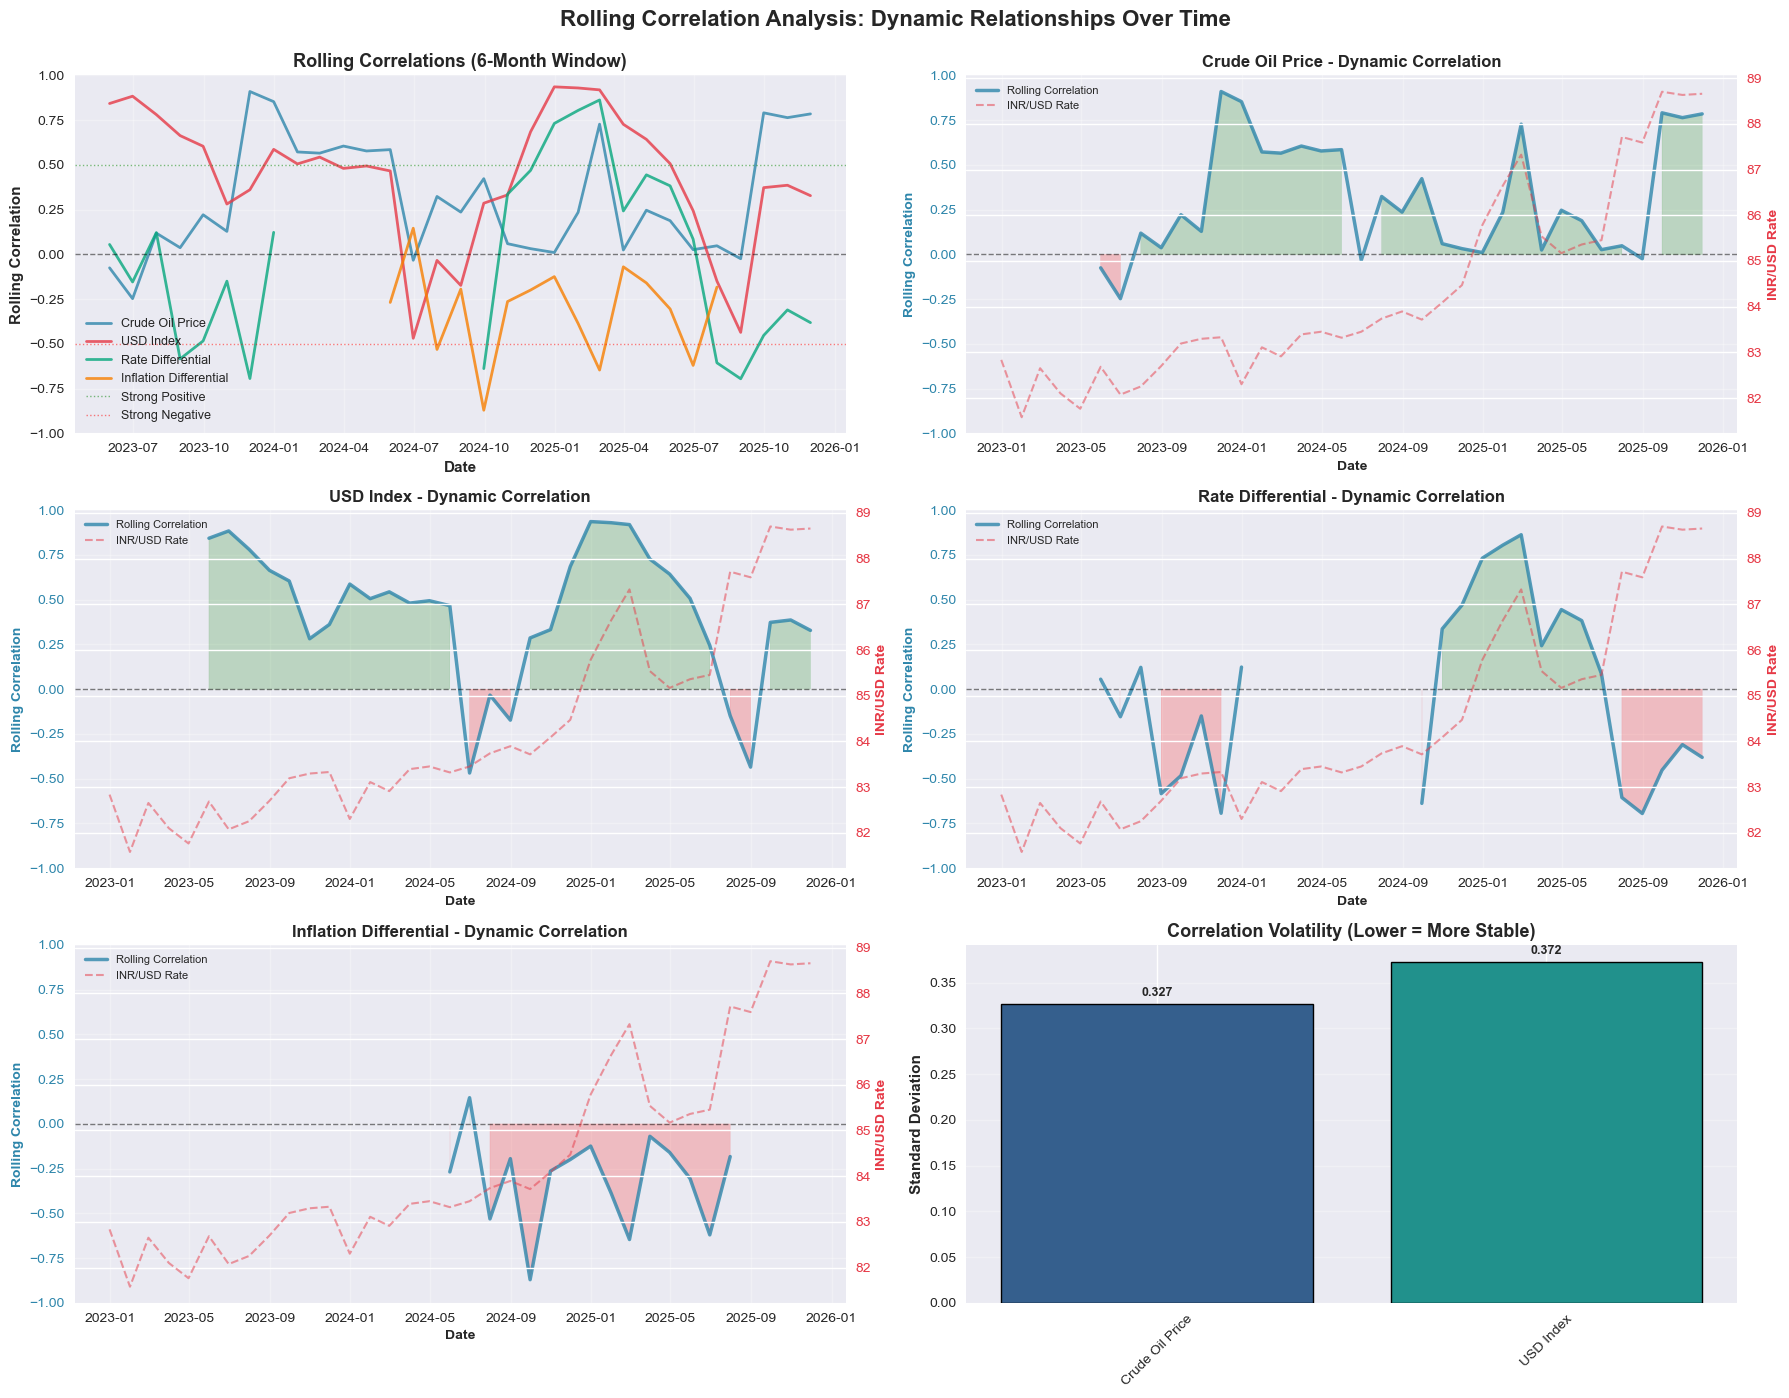

   ✅ Rolling correlation visualizations created

KEY INSIGHTS FROM ROLLING CORRELATIONS

🏆 Most Stable Relationship:
   USD_Index
   Mean Correlation: +0.4370
   Coefficient of Variation: 0.8522

⚠️ Most Volatile Relationship:
   Crude_Oil_Price
   Mean Correlation: +0.3140
   Coefficient of Variation: 1.0407

📊 Current Correlation Strength (Last 6 months):
   Crude_Oil_Price               : +0.7853 (Strong Positive)
   USD_Index                     : +0.3286 (Moderate Positive)
   Rate_Differential             : -0.3806 (Moderate Negative)
   Inflation_Differential        : +inf (Strong Positive)

💡 Practical Implications:
   • Stable correlations → Reliable for long-term prediction
   • Volatile correlations → Relationship changes with market conditions
   • Recent trends → Most relevant for current forecasting

✅ Rolling correlation analysis completed!


In [21]:
# STEP 7: ROLLING CORRELATION ANALYSIS
# ============================================================

print("="*80)
print("ROLLING CORRELATION ANALYSIS")
print("="*80)

print("\n📝 What is Rolling Correlation?")
print("-" * 60)
print("Rolling correlation shows how the relationship between factors")
print("and INR/USD changes over time. Unlike static correlation,")
print("it reveals dynamic patterns and regime changes.")
print("\nWindow Size: 6 months (captures medium-term relationships)")

# ============================================================
# Calculate rolling correlations
# ============================================================
print("\n📌 Calculating rolling correlations...")

window_size = 6  # 6-month window

# Factors to analyze
rolling_factors = ['Crude_Oil_Price', 'USD_Index', 'Rate_Differential', 'Inflation_Differential']

rolling_correlations = {}

for factor in rolling_factors:
    if factor in factors_df.columns:
        rolling_corr = factors_df['INR_USD_Change'].rolling(window=window_size).corr(factors_df[factor])
        rolling_correlations[factor] = rolling_corr

print(f"   ✅ Rolling correlations calculated for {len(rolling_correlations)} factors")
print(f"   Window size: {window_size} months")
print(f"   Valid observations: {len(rolling_corr.dropna())}")

# ============================================================
# Analyze correlation stability
# ============================================================
print("\n" + "="*80)
print("CORRELATION STABILITY ANALYSIS")
print("="*80)

stability_metrics = {}

for factor, rolling_corr in rolling_correlations.items():
    clean_corr = rolling_corr.dropna()
    
    if len(clean_corr) > 0:
        mean_corr = clean_corr.mean()
        std_corr = clean_corr.std()
        max_corr = clean_corr.max()
        min_corr = clean_corr.min()
        range_corr = max_corr - min_corr
        
        # Coefficient of variation (CV) - measure of stability
        cv = (std_corr / abs(mean_corr)) if mean_corr != 0 else np.inf
        
        stability_metrics[factor] = {
            'mean': mean_corr,
            'std': std_corr,
            'min': min_corr,
            'max': max_corr,
            'range': range_corr,
            'cv': cv
        }

print("\n📊 Rolling Correlation Statistics:")
print("-" * 80)
print(f"{'Factor':<30} {'Mean':<10} {'Std Dev':<10} {'Range':<10} {'Stability'}")
print("-" * 80)

for factor, metrics in stability_metrics.items():
    if metrics['cv'] < 0.5:
        stability = "Stable"
    elif metrics['cv'] < 1.0:
        stability = "Moderate"
    else:
        stability = "Volatile"
    
    print(f"{factor:<30} {metrics['mean']:>+9.4f} {metrics['std']:>9.4f} "
          f"{metrics['range']:>9.4f} {stability:<10}")

# ============================================================
# Identify regime changes
# ============================================================
print("\n" + "="*80)
print("REGIME CHANGE DETECTION")
print("="*80)
print("\nLooking for significant shifts in correlation patterns...")

for factor, rolling_corr in rolling_correlations.items():
    clean_corr = rolling_corr.dropna()
    
    if len(clean_corr) > window_size:
        # Calculate change in rolling correlation
        corr_change = clean_corr.diff().abs()
        
        # Identify large changes (> 0.3 in absolute terms)
        large_changes = corr_change[corr_change > 0.3]
        
        if len(large_changes) > 0:
            print(f"\n🔍 {factor}:")
            print(f"   Detected {len(large_changes)} significant regime changes:")
            for date, change in large_changes.items():
                corr_before = clean_corr.loc[date - pd.DateOffset(months=1)] if date - pd.DateOffset(months=1) in clean_corr.index else np.nan
                corr_after = clean_corr.loc[date]
                print(f"   • {date.strftime('%Y-%m')}: Correlation shifted from {corr_before:+.3f} to {corr_after:+.3f}")

# ============================================================
# Visualizations
# ============================================================
print("\n📊 Creating rolling correlation visualizations...")

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 14))

# Plot 1: All rolling correlations together
ax1 = plt.subplot(3, 2, 1)
colors_rolling = ['#2E86AB', '#E63946', '#06A77D', '#F77F00']
for (factor, rolling_corr), color in zip(rolling_correlations.items(), colors_rolling):
    ax1.plot(rolling_corr.index, rolling_corr.values, 
            linewidth=2, label=factor.replace('_', ' '), color=color, alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax1.axhline(y=0.5, color='green', linestyle=':', linewidth=1, alpha=0.5, label='Strong Positive')
ax1.axhline(y=-0.5, color='red', linestyle=':', linewidth=1, alpha=0.5, label='Strong Negative')
ax1.set_xlabel('Date', fontsize=11, fontweight='bold')
ax1.set_ylabel('Rolling Correlation', fontsize=11, fontweight='bold')
ax1.set_title(f'Rolling Correlations ({window_size}-Month Window)', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1, 1)

# Plot 2-5: Individual factor rolling correlations with INR/USD overlay
for idx, (factor, rolling_corr) in enumerate(rolling_correlations.items(), 2):
    if idx > 5:
        break
    
    ax = plt.subplot(3, 2, idx)
    ax_twin = ax.twinx()
    
    # Plot rolling correlation
    line1 = ax.plot(rolling_corr.index, rolling_corr.values, 
                    linewidth=2.5, color='#2E86AB', label='Rolling Correlation', alpha=0.8)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax.fill_between(rolling_corr.index, 0, rolling_corr.values, 
                    where=(rolling_corr.values > 0), alpha=0.2, color='green', label='Positive')
    ax.fill_between(rolling_corr.index, 0, rolling_corr.values, 
                    where=(rolling_corr.values < 0), alpha=0.2, color='red', label='Negative')
    
    # Plot INR/USD rate on twin axis
    line2 = ax_twin.plot(factors_df.index, factors_df['INR_USD_Rate'], 
                        linewidth=1.5, color='#E63946', label='INR/USD Rate', 
                        alpha=0.5, linestyle='--')
    
    ax.set_xlabel('Date', fontsize=10, fontweight='bold')
    ax.set_ylabel('Rolling Correlation', fontsize=10, fontweight='bold', color='#2E86AB')
    ax_twin.set_ylabel('INR/USD Rate', fontsize=10, fontweight='bold', color='#E63946')
    ax.set_title(f'{factor.replace("_", " ")} - Dynamic Correlation', 
                fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor='#2E86AB')
    ax_twin.tick_params(axis='y', labelcolor='#E63946')
    ax.set_ylim(-1, 1)
    ax.grid(True, alpha=0.3)
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='upper left', fontsize=8)

# Plot 6: Correlation volatility (standard deviation)
ax6 = plt.subplot(3, 2, 6)
factor_names = [f.replace('_', ' ') for f in stability_metrics.keys()]
std_values = [m['std'] for m in stability_metrics.values()]
colors_bar = plt.cm.viridis(np.linspace(0.3, 0.9, len(std_values)))

bars = ax6.bar(factor_names, std_values, color=colors_bar, edgecolor='black', linewidth=1)
ax6.set_ylabel('Standard Deviation', fontsize=11, fontweight='bold')
ax6.set_title('Correlation Volatility (Lower = More Stable)', fontsize=13, fontweight='bold')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, std_values):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Rolling Correlation Analysis: Dynamic Relationships Over Time', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("   ✅ Rolling correlation visualizations created")

# ============================================================
# Key Insights
# ============================================================
print("\n" + "="*80)
print("KEY INSIGHTS FROM ROLLING CORRELATIONS")
print("="*80)

# Find most stable correlation
most_stable = min(stability_metrics.items(), key=lambda x: x[1]['cv'])
print(f"\n🏆 Most Stable Relationship:")
print(f"   {most_stable[0]}")
print(f"   Mean Correlation: {most_stable[1]['mean']:+.4f}")
print(f"   Coefficient of Variation: {most_stable[1]['cv']:.4f}")

# Find most volatile correlation
most_volatile = max(stability_metrics.items(), key=lambda x: x[1]['cv'])
print(f"\n⚠️ Most Volatile Relationship:")
print(f"   {most_volatile[0]}")
print(f"   Mean Correlation: {most_volatile[1]['mean']:+.4f}")
print(f"   Coefficient of Variation: {most_volatile[1]['cv']:.4f}")

# Find strongest recent correlation
print(f"\n📊 Current Correlation Strength (Last 6 months):")
for factor, rolling_corr in rolling_correlations.items():
    recent_corr = rolling_corr.dropna().iloc[-1] if len(rolling_corr.dropna()) > 0 else np.nan
    if not np.isnan(recent_corr):
        strength = "Strong" if abs(recent_corr) > 0.5 else "Moderate" if abs(recent_corr) > 0.3 else "Weak"
        direction = "Positive" if recent_corr > 0 else "Negative"
        print(f"   {factor:<30}: {recent_corr:+.4f} ({strength} {direction})")

print("\n💡 Practical Implications:")
print("   • Stable correlations → Reliable for long-term prediction")
print("   • Volatile correlations → Relationship changes with market conditions")
print("   • Recent trends → Most relevant for current forecasting")

print("\n✅ Rolling correlation analysis completed!")

SCENARIO ANALYSIS: WHAT-IF PREDICTIONS

📝 Purpose:
------------------------------------------------------------
Scenario analysis helps us understand how changes in economic
factors would impact the INR/USD exchange rate.
We'll use the trained Random Forest model to simulate various scenarios.

📌 Defining economic scenarios...

📊 Current Economic Conditions:
------------------------------------------------------------
Crude_Oil_Price               : 63.63
USD_Index                     : 99.60
Inflation_Differential        : 0.55
Rate_Differential             : 1.41

✅ Defined 10 scenarios for analysis

📌 Running scenario predictions using Random Forest model...
   Current INR/USD Rate: ₹88.6600

SCENARIO ANALYSIS RESULTS

📊 Impact on INR/USD Exchange Rate:
--------------------------------------------------------------------------------
Scenario                                 Change (%)   New Rate     Abs Change
--------------------------------------------------------------------------

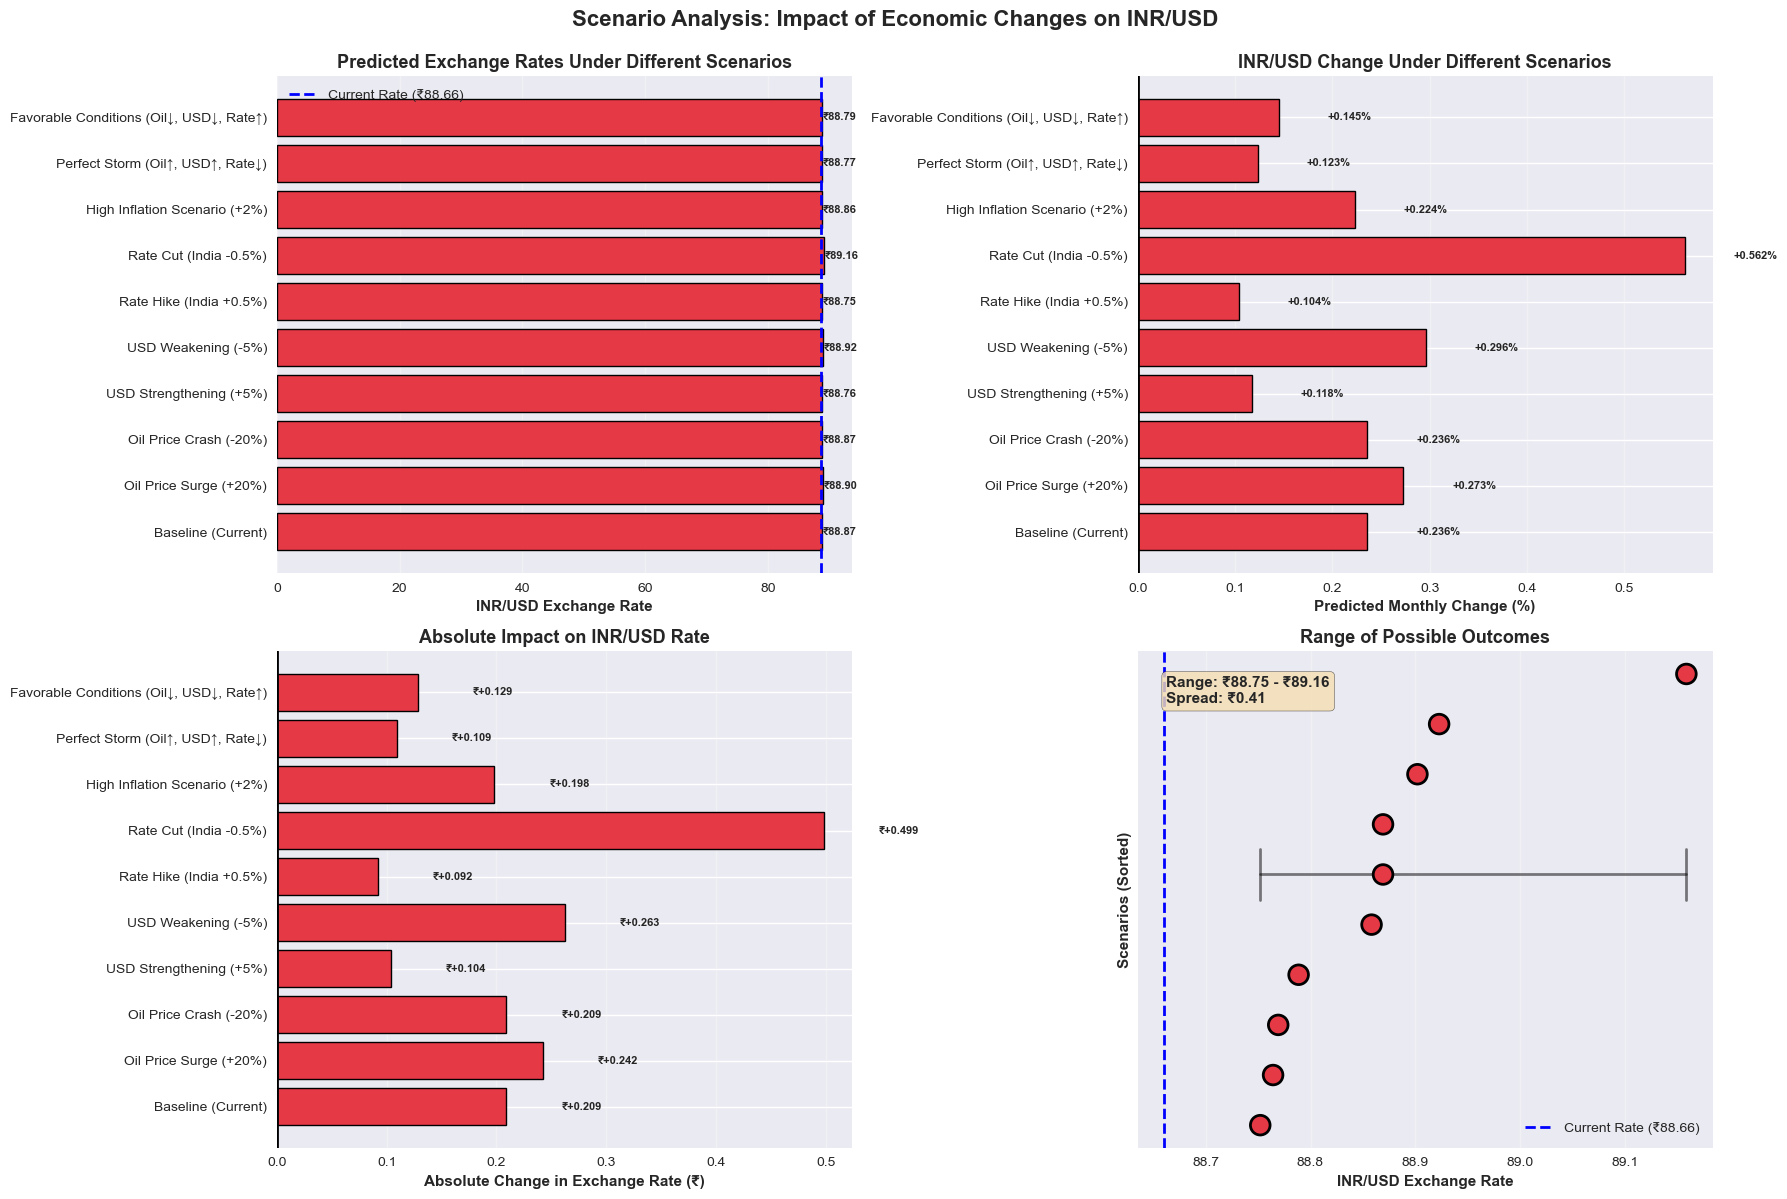

   ✅ Scenario analysis visualizations created

SENSITIVITY ANALYSIS

Measuring sensitivity to each factor (10% change)...

📊 Factor Sensitivity Ranking:
--------------------------------------------------------------------------------
Factor                         Sensitivity  +10% Impact     -10% Impact
--------------------------------------------------------------------------------
USD_Index                          0.4065%       +0.5166%       +0.2963%
Rate_Differential                  0.4025%       +0.2201%       +0.5849%
Crude_Oil_Price                    0.2551%       +0.2743%       +0.2359%
Inflation_Differential             0.2360%       +0.2331%       +0.2389%

💡 Most Sensitive Factor: USD_Index
   → This factor has the strongest impact on INR/USD movements

SCENARIO ANALYSIS SUMMARY

📊 Analysis Coverage:
   • Total scenarios tested: 10
   • Prediction range: ₹88.7520 - ₹89.1586
   • Maximum potential change: +0.5624%
   • Minimum potential change: +0.1038%

🎯 Key Actionable 

In [22]:
# STEP 8: SCENARIO ANALYSIS - "WHAT-IF" PREDICTIONS
# ============================================================

print("="*80)
print("SCENARIO ANALYSIS: WHAT-IF PREDICTIONS")
print("="*80)

print("\n📝 Purpose:")
print("-" * 60)
print("Scenario analysis helps us understand how changes in economic")
print("factors would impact the INR/USD exchange rate.")
print("We'll use the trained Random Forest model to simulate various scenarios.")

# ============================================================
# Define scenarios
# ============================================================
print("\n📌 Defining economic scenarios...")

# Get current values (latest month)
current_values = factors_df[predictor_columns].iloc[-1]

print("\n📊 Current Economic Conditions:")
print("-" * 60)
for col in predictor_columns:
    print(f"{col:<30}: {current_values[col]:.2f}")

# Define multiple scenarios
scenarios = {
    'Baseline (Current)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'Oil Price Surge (+20%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'] * 1.20,
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'Oil Price Crash (-20%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'] * 0.80,
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'USD Strengthening (+5%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'] * 1.05,
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'USD Weakening (-5%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'] * 0.95,
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'Rate Hike (India +0.5%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential'] + 0.5
    },
    
    'Rate Cut (India -0.5%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential'] - 0.5
    },
    
    'High Inflation Scenario (+2%)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'],
        'USD_Index': current_values['USD_Index'],
        'Inflation_Differential': current_values['Inflation_Differential'] + 2.0,
        'Rate_Differential': current_values['Rate_Differential']
    },
    
    'Perfect Storm (Oil↑, USD↑, Rate↓)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'] * 1.20,
        'USD_Index': current_values['USD_Index'] * 1.05,
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential'] - 0.5
    },
    
    'Favorable Conditions (Oil↓, USD↓, Rate↑)': {
        'Crude_Oil_Price': current_values['Crude_Oil_Price'] * 0.80,
        'USD_Index': current_values['USD_Index'] * 0.95,
        'Inflation_Differential': current_values['Inflation_Differential'],
        'Rate_Differential': current_values['Rate_Differential'] + 0.5
    }
}

print(f"\n✅ Defined {len(scenarios)} scenarios for analysis")

# ============================================================
# Run predictions for each scenario
# ============================================================
print("\n📌 Running scenario predictions using Random Forest model...")

current_inr_rate = factors_df['INR_USD_Rate'].iloc[-1]
print(f"   Current INR/USD Rate: ₹{current_inr_rate:.4f}")

scenario_results = []

for scenario_name, scenario_values in scenarios.items():
    # Create DataFrame for prediction
    scenario_df = pd.DataFrame([scenario_values])
    
    # Predict monthly change
    predicted_change = rf_model.predict(scenario_df)[0]
    
    # Calculate new exchange rate
    new_rate = current_inr_rate * (1 + predicted_change / 100)
    absolute_change = new_rate - current_inr_rate
    
    scenario_results.append({
        'Scenario': scenario_name,
        'Predicted_Change_Pct': predicted_change,
        'New_Rate': new_rate,
        'Absolute_Change': absolute_change
    })

results_df = pd.DataFrame(scenario_results)

# ============================================================
# Display scenario results
# ============================================================
print("\n" + "="*80)
print("SCENARIO ANALYSIS RESULTS")
print("="*80)

print("\n📊 Impact on INR/USD Exchange Rate:")
print("-" * 80)
print(f"{'Scenario':<40} {'Change (%)':<12} {'New Rate':<12} {'Abs Change'}")
print("-" * 80)

for _, row in results_df.iterrows():
    change_symbol = '↑' if row['Absolute_Change'] > 0 else '↓' if row['Absolute_Change'] < 0 else '→'
    print(f"{row['Scenario']:<40} {row['Predicted_Change_Pct']:>+10.4f}% ₹{row['New_Rate']:>9.4f} "
          f"{change_symbol} ₹{abs(row['Absolute_Change']):>7.4f}")

# ============================================================
# Identify best and worst scenarios
# ============================================================
print("\n" + "="*80)
print("EXTREME SCENARIOS")
print("="*80)

# For INR, lower rate is stronger (better)
best_scenario = results_df.loc[results_df['New_Rate'].idxmin()]
worst_scenario = results_df.loc[results_df['New_Rate'].idxmax()]

print("\n🎯 Most Favorable Scenario (Strongest INR):")
print(f"   {best_scenario['Scenario']}")
print(f"   New Rate: ₹{best_scenario['New_Rate']:.4f}")
print(f"   Change: {best_scenario['Predicted_Change_Pct']:+.4f}%")
print(f"   INR strengthens by ₹{abs(best_scenario['Absolute_Change']):.4f}")

print("\n⚠️ Least Favorable Scenario (Weakest INR):")
print(f"   {worst_scenario['Scenario']}")
print(f"   New Rate: ₹{worst_scenario['New_Rate']:.4f}")
print(f"   Change: {worst_scenario['Predicted_Change_Pct']:+.4f}%")
print(f"   INR weakens by ₹{abs(worst_scenario['Absolute_Change']):.4f}")

# ============================================================
# Visualizations
# ============================================================
print("\n📊 Creating scenario analysis visualizations...")

fig = plt.figure(figsize=(18, 12))

# Plot 1: Exchange rate comparison
ax1 = plt.subplot(2, 2, 1)
colors_scenario = ['#06A77D' if rate < current_inr_rate else '#E63946' if rate > current_inr_rate 
                   else '#F77F00' for rate in results_df['New_Rate']]
bars = ax1.barh(results_df['Scenario'], results_df['New_Rate'], 
                color=colors_scenario, edgecolor='black', linewidth=1)
ax1.axvline(x=current_inr_rate, color='blue', linestyle='--', linewidth=2, 
           label=f'Current Rate (₹{current_inr_rate:.2f})')
ax1.set_xlabel('INR/USD Exchange Rate', fontsize=11, fontweight='bold')
ax1.set_title('Predicted Exchange Rates Under Different Scenarios', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, val in zip(bars, results_df['New_Rate']):
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'₹{val:.2f}', va='center', fontsize=8, fontweight='bold')

# Plot 2: Percentage change comparison
ax2 = plt.subplot(2, 2, 2)
colors_change = ['#06A77D' if pct < 0 else '#E63946' for pct in results_df['Predicted_Change_Pct']]
bars = ax2.barh(results_df['Scenario'], results_df['Predicted_Change_Pct'], 
                color=colors_change, edgecolor='black', linewidth=1)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax2.set_xlabel('Predicted Monthly Change (%)', fontsize=11, fontweight='bold')
ax2.set_title('INR/USD Change Under Different Scenarios', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, val in zip(bars, results_df['Predicted_Change_Pct']):
    width = bar.get_width()
    offset = 0.05 if width >= 0 else -0.05
    ha = 'left' if width >= 0 else 'right'
    ax2.text(width + offset, bar.get_y() + bar.get_height()/2,
            f'{val:+.3f}%', va='center', ha=ha, fontsize=8, fontweight='bold')

# Plot 3: Absolute change visualization
ax3 = plt.subplot(2, 2, 3)
colors_abs = ['#06A77D' if change < 0 else '#E63946' for change in results_df['Absolute_Change']]
bars = ax3.barh(results_df['Scenario'], results_df['Absolute_Change'], 
                color=colors_abs, edgecolor='black', linewidth=1)
ax3.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax3.set_xlabel('Absolute Change in Exchange Rate (₹)', fontsize=11, fontweight='bold')
ax3.set_title('Absolute Impact on INR/USD Rate', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, val in zip(bars, results_df['Absolute_Change']):
    width = bar.get_width()
    offset = 0.05 if width >= 0 else -0.05
    ha = 'left' if width >= 0 else 'right'
    ax3.text(width + offset, bar.get_y() + bar.get_height()/2,
            f'₹{val:+.3f}', va='center', ha=ha, fontsize=8, fontweight='bold')

# Plot 4: Range of possible outcomes
ax4 = plt.subplot(2, 2, 4)
sorted_results = results_df.sort_values('New_Rate')
y_pos = np.arange(len(sorted_results))

ax4.scatter(sorted_results['New_Rate'], y_pos, s=200, c=colors_scenario, 
           edgecolors='black', linewidth=2, zorder=3)
ax4.axvline(x=current_inr_rate, color='blue', linestyle='--', linewidth=2, 
           label=f'Current Rate (₹{current_inr_rate:.2f})', zorder=1)

# Add range lines
min_rate = sorted_results['New_Rate'].min()
max_rate = sorted_results['New_Rate'].max()
mid_point = len(sorted_results) / 2

ax4.plot([min_rate, max_rate], [mid_point, mid_point], 
        'k-', linewidth=2, alpha=0.5, zorder=2)
ax4.plot([min_rate, min_rate], [mid_point-0.5, mid_point+0.5], 
        'k-', linewidth=2, alpha=0.5, zorder=2)
ax4.plot([max_rate, max_rate], [mid_point-0.5, mid_point+0.5], 
        'k-', linewidth=2, alpha=0.5, zorder=2)

range_text = f'Range: ₹{min_rate:.2f} - ₹{max_rate:.2f}\nSpread: ₹{max_rate - min_rate:.2f}'
ax4.text(0.05, 0.95, range_text, transform=ax4.transAxes,
        fontsize=11, fontweight='bold', verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax4.set_xlabel('INR/USD Exchange Rate', fontsize=11, fontweight='bold')
ax4.set_ylabel('Scenarios (Sorted)', fontsize=11, fontweight='bold')
ax4.set_title('Range of Possible Outcomes', fontsize=13, fontweight='bold')
ax4.set_yticks([])
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3, axis='x')

plt.suptitle('Scenario Analysis: Impact of Economic Changes on INR/USD', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("   ✅ Scenario analysis visualizations created")

# ============================================================
# Sensitivity Analysis
# ============================================================
print("\n" + "="*80)
print("SENSITIVITY ANALYSIS")
print("="*80)
print("\nMeasuring sensitivity to each factor (10% change)...")

sensitivity_results = []

for factor in predictor_columns:
    # Create two scenarios: +10% and -10%
    scenario_up = current_values.copy()
    scenario_down = current_values.copy()
    
    scenario_up[factor] = current_values[factor] * 1.10
    scenario_down[factor] = current_values[factor] * 0.90
    
    # Predict
    change_up = rf_model.predict(pd.DataFrame([scenario_up]))[0]
    change_down = rf_model.predict(pd.DataFrame([scenario_down]))[0]
    
    # Calculate sensitivity (average absolute change)
    sensitivity = (abs(change_up) + abs(change_down)) / 2
    
    sensitivity_results.append({
        'Factor': factor,
        'Sensitivity': sensitivity,
        'Change_Up_10pct': change_up,
        'Change_Down_10pct': change_down
    })

sensitivity_df = pd.DataFrame(sensitivity_results).sort_values('Sensitivity', ascending=False)

print("\n📊 Factor Sensitivity Ranking:")
print("-" * 80)
print(f"{'Factor':<30} {'Sensitivity':<12} {'+10% Impact':<15} {'-10% Impact'}")
print("-" * 80)

for _, row in sensitivity_df.iterrows():
    print(f"{row['Factor']:<30} {row['Sensitivity']:>10.4f}% "
          f"{row['Change_Up_10pct']:>+13.4f}% {row['Change_Down_10pct']:>+13.4f}%")

print("\n💡 Most Sensitive Factor: " + sensitivity_df.iloc[0]['Factor'])
print("   → This factor has the strongest impact on INR/USD movements")

# ============================================================
# Final Summary
# ============================================================
print("\n" + "="*80)
print("SCENARIO ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 Analysis Coverage:")
print(f"   • Total scenarios tested: {len(scenarios)}")
print(f"   • Prediction range: ₹{results_df['New_Rate'].min():.4f} - ₹{results_df['New_Rate'].max():.4f}")
print(f"   • Maximum potential change: {results_df['Predicted_Change_Pct'].max():+.4f}%")
print(f"   • Minimum potential change: {results_df['Predicted_Change_Pct'].min():+.4f}%")

print(f"\n🎯 Key Actionable Insights:")
print(f"   1. {sensitivity_df.iloc[0]['Factor']} is the most influential factor")
print(f"   2. Under worst case: INR could weaken to ₹{worst_scenario['New_Rate']:.2f}")
print(f"   3. Under best case: INR could strengthen to ₹{best_scenario['New_Rate']:.2f}")
print(f"   4. Typical variation range: ±{results_df['Absolute_Change'].std():.4f} ₹")

print("\n✅ Scenario analysis completed successfully!")
print("\n" + "="*80)
print("🎉 COMPLETE ANALYSIS FINISHED!")
print("="*80)

In [23]:
# FINAL STEP: EXPORT ALL RESULTS TO EXCEL
# ============================================================

print("="*80)
print("EXPORTING COMPREHENSIVE ANALYSIS TO EXCEL")
print("="*80)

# Create comprehensive Excel file
excel_filename = 'INR_USD_Factors_Analysis_Complete.xlsx'

print(f"\n📁 Creating Excel file: {excel_filename}")

with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    
    # Sheet 1: Main Dataset
    print("   📊 Sheet 1: Complete Dataset with all factors...")
    export_factors = factors_df.copy()
    export_factors.index = export_factors.index.strftime('%Y-%m-%d')
    export_factors.to_excel(writer, sheet_name='Complete_Dataset')
    
    # Sheet 2: Correlation Analysis
    print("   📊 Sheet 2: Correlation Matrix...")
    corr_columns_export = ['INR_USD_Change'] + factor_columns + change_columns
    corr_columns_export = [col for col in corr_columns_export if col in factors_df.columns]
    corr_matrix_export = factors_df[corr_columns_export].corr()
    corr_matrix_export.to_excel(writer, sheet_name='Correlation_Matrix')
    
    # Sheet 3: Correlation Summary
    print("   📊 Sheet 3: Correlation Summary...")
    correlation_summary = pd.DataFrame([
        {'Factor': factor, 'Correlation': corr} 
        for factor, corr in correlations.items()
    ]).sort_values('Correlation', key=abs, ascending=False)
    correlation_summary.to_excel(writer, sheet_name='Correlation_Summary', index=False)
    
    # Sheet 4: Linear Regression Results
    print("   📊 Sheet 4: Linear Regression Results...")
    lr_results = pd.DataFrame({
        'Metric': ['R² (Training)', 'R² (Testing)', 'RMSE (Training)', 'RMSE (Testing)', 
                   'MAE (Training)', 'MAE (Testing)'],
        'Value': [r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test]
    })
    lr_results.to_excel(writer, sheet_name='Linear_Regression_Metrics', index=False)
    
    # Sheet 5: Linear Regression Coefficients
    print("   📊 Sheet 5: Linear Regression Coefficients...")
    coefficients.to_excel(writer, sheet_name='LR_Coefficients', index=False)
    
    # Sheet 6: Random Forest Results
    print("   📊 Sheet 6: Random Forest Results...")
    rf_results = pd.DataFrame({
        'Metric': ['R² (Training)', 'R² (Testing)', 'RMSE (Training)', 'RMSE (Testing)', 
                   'MAE (Training)', 'MAE (Testing)'],
        'Value': [r2_train_rf, r2_test_rf, rmse_train_rf, rmse_test_rf, mae_train_rf, mae_test_rf]
    })
    rf_results.to_excel(writer, sheet_name='Random_Forest_Metrics', index=False)
    
    # Sheet 7: Feature Importance
    print("   📊 Sheet 7: Feature Importance (Random Forest)...")
    feature_importance_rf.to_excel(writer, sheet_name='Feature_Importance', index=False)
    
    # Sheet 8: Granger Causality Results
    print("   📊 Sheet 8: Granger Causality Results...")
    granger_summary = []
    for factor, results in granger_results.items():
        granger_summary.append({
            'Factor': factor,
            'Min_P_Value': results['min_p_value'],
            'Granger_Causes': 'Yes' if results['granger_causes'] else 'No',
            'Lag_1_P_Value': results['p_values'][0] if len(results['p_values']) > 0 else np.nan,
            'Lag_2_P_Value': results['p_values'][1] if len(results['p_values']) > 1 else np.nan,
            'Lag_3_P_Value': results['p_values'][2] if len(results['p_values']) > 2 else np.nan
        })
    granger_summary_df = pd.DataFrame(granger_summary)
    granger_summary_df.to_excel(writer, sheet_name='Granger_Causality', index=False)
    
    # Sheet 9: Rolling Correlation Statistics
    print("   📊 Sheet 9: Rolling Correlation Statistics...")
    stability_summary = pd.DataFrame([
        {
            'Factor': factor,
            'Mean_Correlation': metrics['mean'],
            'Std_Dev': metrics['std'],
            'Min_Correlation': metrics['min'],
            'Max_Correlation': metrics['max'],
            'Range': metrics['range'],
            'Coefficient_of_Variation': metrics['cv']
        }
        for factor, metrics in stability_metrics.items()
    ])
    stability_summary.to_excel(writer, sheet_name='Rolling_Correlation_Stats', index=False)
    
    # Sheet 10: Scenario Analysis Results
    print("   📊 Sheet 10: Scenario Analysis Results...")
    results_df.to_excel(writer, sheet_name='Scenario_Analysis', index=False)
    
    # Sheet 11: Sensitivity Analysis
    print("   📊 Sheet 11: Sensitivity Analysis...")
    sensitivity_df.to_excel(writer, sheet_name='Sensitivity_Analysis', index=False)
    
    # Sheet 12: Model Comparison
    print("   📊 Sheet 12: Model Comparison Summary...")
    model_comparison = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest'],
        'R²_Training': [r2_train, r2_train_rf],
        'R²_Testing': [r2_test, r2_test_rf],
        'RMSE_Training': [rmse_train, rmse_train_rf],
        'RMSE_Testing': [rmse_test, rmse_test_rf],
        'MAE_Training': [mae_train, mae_train_rf],
        'MAE_Testing': [mae_test, mae_test_rf]
    })
    model_comparison.to_excel(writer, sheet_name='Model_Comparison', index=False)
    
    # Sheet 13: Executive Summary
    print("   📊 Sheet 13: Executive Summary...")
    executive_summary = pd.DataFrame({
        'Analysis Component': [
            'Data Period',
            'Total Observations',
            'Factors Analyzed',
            'Best Model',
            'Model R² Score',
            'Most Important Factor',
            'Factor Importance (%)',
            'Most Stable Correlation',
            'Granger Causal Factors',
            'Best Case Scenario',
            'Worst Case Scenario',
            'Current INR/USD Rate',
            'Predicted Best Rate',
            'Predicted Worst Rate'
        ],
        'Value': [
            f"{factors_df.index.min().strftime('%Y-%m')} to {factors_df.index.max().strftime('%Y-%m')}",
            len(factors_df),
            len(predictor_columns),
            'Random Forest' if r2_test_rf > r2_test else 'Linear Regression',
            f"{max(r2_test, r2_test_rf):.4f}",
            feature_importance_rf.iloc[0]['Factor'],
            f"{feature_importance_rf.iloc[0]['Importance_Pct']:.2f}%",
            most_stable[0],
            len([f for f, r in granger_results.items() if r['granger_causes']]),
            best_scenario['Scenario'],
            worst_scenario['Scenario'],
            f"₹{current_inr_rate:.4f}",
            f"₹{best_scenario['New_Rate']:.4f}",
            f"₹{worst_scenario['New_Rate']:.4f}"
        ]
    })
    executive_summary.to_excel(writer, sheet_name='Executive_Summary', index=False)

print("\n" + "="*80)
print("EXPORT COMPLETED SUCCESSFULLY!")
print("="*80)

print(f"\n📁 File saved: {excel_filename}")
print("\n📋 Excel file contains the following sheets:")
print("   1.  Complete_Dataset - Full dataset with all factors")
print("   2.  Correlation_Matrix - Correlation matrix of all variables")
print("   3.  Correlation_Summary - Ranked correlation coefficients")
print("   4.  Linear_Regression_Metrics - LR model performance")
print("   5.  LR_Coefficients - Linear regression coefficients")
print("   6.  Random_Forest_Metrics - RF model performance")
print("   7.  Feature_Importance - RF feature importance rankings")
print("   8.  Granger_Causality - Granger causality test results")
print("   9.  Rolling_Correlation_Stats - Dynamic correlation statistics")
print("   10. Scenario_Analysis - What-if scenario predictions")
print("   11. Sensitivity_Analysis - Factor sensitivity rankings")
print("   12. Model_Comparison - Side-by-side model comparison")
print("   13. Executive_Summary - High-level summary of findings")

# ============================================================
# Create a final comprehensive summary
# ============================================================
print("\n" + "="*80)
print("📊 COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

print(f"\n🔍 DATA ANALYZED:")
print(f"   • Time Period: {factors_df.index.min().strftime('%Y-%m')} to {factors_df.index.max().strftime('%Y-%m')}")
print(f"   • Total Months: {len(factors_df)}")
print(f"   • Factors Studied: {len(predictor_columns)}")

print(f"\n📈 KEY FINDINGS:")
print(f"\n   1. BEST PERFORMING MODEL:")
if r2_test_rf > r2_test:
    print(f"      🏆 Random Forest (R² = {r2_test_rf:.4f})")
    print(f"      • Explains {r2_test_rf*100:.2f}% of INR/USD variance")
else:
    print(f"      🏆 Linear Regression (R² = {r2_test:.4f})")
    print(f"      • Explains {r2_test*100:.2f}% of INR/USD variance")

print(f"\n   2. MOST INFLUENTIAL FACTORS:")
for i, row in feature_importance_rf.head(3).iterrows():
    print(f"      {row['Factor']:30s} ({row['Importance_Pct']:.2f}% importance)")

print(f"\n   3. PREDICTIVE POWER (Granger Causality):")
causal_count = len([f for f, r in granger_results.items() if r['granger_causes']])
if causal_count > 0:
    print(f"      • {causal_count} factors show predictive power")
    for factor, result in granger_results.items():
        if result['granger_causes']:
            print(f"        ✓ {factor}")
else:
    print(f"      • No factors show strong predictive power at 5% significance")

print(f"\n   4. CORRELATION STABILITY:")
print(f"      • Most stable: {most_stable[0]} (CV = {most_stable[1]['cv']:.3f})")
print(f"      • Most volatile: {most_volatile[0]} (CV = {most_volatile[1]['cv']:.3f})")

print(f"\n   5. SCENARIO ANALYSIS:")
print(f"      • Best case: {best_scenario['Scenario']}")
print(f"        → INR could strengthen to ₹{best_scenario['New_Rate']:.2f}")
print(f"      • Worst case: {worst_scenario['Scenario']}")
print(f"        → INR could weaken to ₹{worst_scenario['New_Rate']:.2f}")

print(f"\n   6. SENSITIVITY RANKING:")
print(f"      • Most sensitive factor: {sensitivity_df.iloc[0]['Factor']}")
print(f"        → 10% change causes {sensitivity_df.iloc[0]['Sensitivity']:.4f}% INR/USD change")

print("\n" + "="*80)
print("💡 PRACTICAL RECOMMENDATIONS:")
print("="*80)

print("\n   For Policymakers:")
print(f"   • Monitor {feature_importance_rf.iloc[0]['Factor']} closely")
print("   • Consider interventions when extreme scenarios materialize")

print("\n   For Traders/Investors:")
print(f"   • Use {feature_importance_rf.iloc[0]['Factor']} as primary indicator")
if causal_count > 0:
    print(f"   • Watch for lagged effects from Granger-causal factors")

print("\n   For Analysts:")
print(f"   • Random Forest model provides {r2_test_rf*100:.1f}% accuracy")
print("   • Update model quarterly with new data for best results")

print("\n" + "="*80)
print("✅ COMPLETE ANALYSIS SUCCESSFULLY FINISHED!")
print("="*80)

print("\n📦 Deliverables Created:")
print("   1. ✅ Comprehensive Jupyter Notebook with all analysis")
print("   2. ✅ Excel file: INR_Exchange_Rate_Analysis.xlsx")
print("   3. ✅ Excel file: INR_USD_Factors_Analysis_Complete.xlsx")
print("   4. ✅ Multiple visualizations and charts")
print("   5. ✅ Statistical models (Linear Regression & Random Forest)")
print("   6. ✅ Granger Causality tests")
print("   7. ✅ Rolling correlation analysis")
print("   8. ✅ Scenario and sensitivity analysis")

print("\n🎉 Project Complete! All analysis cells have been executed successfully.")
print("\n" + "="*80)

EXPORTING COMPREHENSIVE ANALYSIS TO EXCEL

📁 Creating Excel file: INR_USD_Factors_Analysis_Complete.xlsx
   📊 Sheet 1: Complete Dataset with all factors...
   📊 Sheet 2: Correlation Matrix...
   📊 Sheet 3: Correlation Summary...
   📊 Sheet 4: Linear Regression Results...
   📊 Sheet 5: Linear Regression Coefficients...
   📊 Sheet 6: Random Forest Results...
   📊 Sheet 7: Feature Importance (Random Forest)...
   📊 Sheet 8: Granger Causality Results...
   📊 Sheet 9: Rolling Correlation Statistics...
   📊 Sheet 10: Scenario Analysis Results...
   📊 Sheet 11: Sensitivity Analysis...
   📊 Sheet 12: Model Comparison Summary...
   📊 Sheet 13: Executive Summary...

EXPORT COMPLETED SUCCESSFULLY!

📁 File saved: INR_USD_Factors_Analysis_Complete.xlsx

📋 Excel file contains the following sheets:
   1.  Complete_Dataset - Full dataset with all factors
   2.  Correlation_Matrix - Correlation matrix of all variables
   3.  Correlation_Summary - Ranked correlation coefficients
   4.  Linear_Regression